<a href="https://colab.research.google.com/github/MAvRK7/A-survey-of-Malware-detection-using-machine-learning-models-/blob/main/cybersec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

algorithms used

1. Traditional Machine Learning Algorithms:
Random Forest (RF): Known for its robustness and ability to handle imbalanced datasets.
Support Vector Machine (SVM): Effective in high-dimensional spaces and when the number of dimensions exceeds the number of samples.
XGBoost: An optimized gradient boosting algorithm, popular for its performance and efficiency.
Logistic Regression: A simple yet effective algorithm for binary classification problems like malware detection.
2. Deep Learning Algorithms:
Convolutional Neural Networks (CNNs): Effective for feature extraction from binary files represented as images or sequences.
Recurrent Neural Networks (RNNs) and LSTM: Useful for sequential data, particularly if you can treat binary files as sequences.
Transformer Models: Advanced models like BERT or GPT, adapted for cybersecurity, are powerful for capturing complex patterns in the data.
Autoencoders: Can be used for anomaly detection by learning the normal behavior of files and identifying deviations.
3. Hybrid and Ensemble Methods:
Stacking Ensemble: Combining predictions from multiple models to improve accuracy.
Voting Classifier: An ensemble method that combines the predictions of several base classifiers.

classification

* -1 : this is unclassifed, can be either benign or malignant
*  0 : benign
*  1 : malignant

for some models, these may be represented by 0,1 and 2 respectively

Data set: EMBER2018- The Endgame Malware Benchmark for Empirical Research, contains attacks from Dec 2006-Dec 2018


so should a file be flagged, quarantined, or allowed to run? This project analyses this


Traditional ML

#Random Forest

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load the training and test datasets
train_path = '/content/train_metadata.csv'
test_path = '/content/test_metadata.csv'

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

# Drop 'Unnamed: 0' column if it exists
train_df = train_df.drop(columns=['Unnamed: 0'], errors='ignore')
test_df = test_df.drop(columns=['Unnamed: 0'], errors='ignore')

# Handle non-numeric 'avclass' column
# Fill NaN values in 'avclass' with a placeholder (e.g., 'unknown')
train_df['avclass'].fillna('unknown', inplace=True)
test_df['avclass'].fillna('unknown', inplace=True)

# Encode categorical columns ('avclass')
le = LabelEncoder()
train_df['avclass'] = le.fit_transform(train_df['avclass'])

# Transform test set 'avclass', handling unseen labels by assigning them a default label (-1)
test_df['avclass'] = test_df['avclass'].apply(lambda x: le.transform([x])[0] if x in le.classes_ else -1)

# Define feature columns and target column
features = ['avclass']  # Add other relevant features if necessary
X_train = train_df[features]
y_train = train_df['label']

X_test = test_df[features]
y_test = test_df['label']

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test data
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.9945
Classification Report:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.99      1.00      1.00    100000
           1       1.00      0.99      0.99    100000

    accuracy                           0.99    200000
   macro avg       0.66      0.66      0.66    200000
weighted avg       1.00      0.99      1.00    200000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load the training and test datasets
train_path = '/content/train_metadata.csv'
test_path = '/content/test_metadata.csv'

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

# Drop 'Unnamed: 0' column if it exists
train_df = train_df.drop(columns=['Unnamed: 0'], errors='ignore')
test_df = test_df.drop(columns=['Unnamed: 0'], errors='ignore')

# Handle non-numeric 'avclass' column
# Fill NaN values in 'avclass' with a placeholder (e.g., 'unknown')
train_df['avclass'].fillna('unknown', inplace=True)
test_df['avclass'].fillna('unknown', inplace=True)

# Encode categorical columns ('avclass')
le_avclass = LabelEncoder()
train_df['avclass'] = le_avclass.fit_transform(train_df['avclass'])

# Transform test set 'avclass', handling unseen labels by assigning them to a new category
test_df['avclass'] = test_df['avclass'].apply(lambda x: le_avclass.transform([x])[0] if x in le_avclass.classes_ else len(le_avclass.classes_))

# Define feature columns and target column
features = ['avclass']  # Add other relevant features if necessary
X_train = train_df[features]
y_train = train_df['label']

X_test = test_df[features]
y_test = test_df['label']

# Encode the target labels, handling unseen labels
le_target = LabelEncoder()
y_train = le_target.fit_transform(y_train)

# For the test set, map unseen labels to a new category
y_test = np.array([le_target.transform([y])[0] if y in le_target.classes_ else len(le_target.classes_) for y in y_test])

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test data
y_pred = rf_model.predict(X_test)

# Convert predictions and true labels back to original format for evaluation
y_pred_original = le_target.inverse_transform(y_pred)
y_test_original = le_target.inverse_transform(y_test[y_test < len(le_target.classes_)])
y_test_original = np.append(y_test_original, ['unknown'] * np.sum(y_test >= len(le_target.classes_)))

# Evaluate the model
accuracy = accuracy_score(y_test_original, y_pred_original)
report = classification_report(y_test_original, y_pred_original)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)

Accuracy: 0.9963
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       0.99      1.00      1.00    100000
         1.0       1.00      0.99      1.00    100000

    accuracy                           1.00    200000
   macro avg       0.66      0.66      0.66    200000
weighted avg       1.00      1.00      1.00    200000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#SVM

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report
from tqdm import tqdm
import time

# Load the data
train_path = '/content/train_metadata.csv'
test_path = '/content/test_metadata.csv'

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

# Preprocess the data
train_df = train_df.drop(columns=['Unnamed: 0'], errors='ignore')
test_df = test_df.drop(columns=['Unnamed: 0'], errors='ignore')

train_df['avclass'].fillna('unknown', inplace=True)
test_df['avclass'].fillna('unknown', inplace=True)

le = LabelEncoder()
train_df['avclass'] = le.fit_transform(train_df['avclass'])
test_df['avclass'] = test_df['avclass'].apply(lambda x: le.transform([x])[0] if x in le.classes_ else -1)

features = ['avclass']  # Add other relevant features if available
X = pd.concat([train_df[features], test_df[features]])
y = pd.concat([train_df['label'], test_df['label']])

# Relabel the target variable
le_target = LabelEncoder()
y = le_target.fit_transform(y)

# Function to sample data if it's too large
def sample_data(X, y, max_samples=100000):
    if len(X) > max_samples:
        indices = np.random.choice(len(X), max_samples, replace=False)
        return X.iloc[indices], y[indices]
    return X, y

# Sample the data if necessary
X, y = sample_data(X, y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the SVM model
print("Training SVM model...")
svm_model = LinearSVC(random_state=42, max_iter=1000)

# Use tqdm to create a progress bar
start_time = time.time()
for _ in tqdm(range(1), desc="SVM Training"):
    svm_model.fit(X_train_scaled, y_train)
end_time = time.time()

print(f"Training completed in {end_time - start_time:.2f} seconds")

# Make predictions
print("Making predictions...")
y_pred = svm_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"SVM Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)

# If you need to map the predictions back to the original labels
original_label_predictions = le_target.inverse_transform(y_pred)

Training SVM model...


SVM Training:   0%|          | 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
SVM Training: 100%|██████████| 1/1 [00:01<00:00,  1.57s/it]

Training completed in 1.59 seconds
Making predictions...
SVM Accuracy: 0.6240
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4023
           1       0.56      1.00      0.72      7984
           2       0.79      0.56      0.66      7993

    accuracy                           0.62     20000
   macro avg       0.45      0.52      0.46     20000
weighted avg       0.54      0.62      0.55     20000




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#XG Boost


In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the training and test datasets
train_path = '/content/train_metadata.csv'
test_path = '/content/test_metadata.csv'

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

# Drop 'Unnamed: 0' column if it exists
train_df = train_df.drop(columns=['Unnamed: 0'], errors='ignore')
test_df = test_df.drop(columns=['Unnamed: 0'], errors='ignore')

# Handle non-numeric 'avclass' column
# Fill NaN values in 'avclass' with a placeholder (e.g., 'unknown')
train_df['avclass'].fillna('unknown', inplace=True)
test_df['avclass'].fillna('unknown', inplace=True)

# Encode categorical columns ('avclass')
le_avclass = LabelEncoder()
train_df['avclass'] = le_avclass.fit_transform(train_df['avclass'])

# Transform test set 'avclass', handling unseen labels by assigning them a default label (-1)
test_df['avclass'] = test_df['avclass'].apply(lambda x: le_avclass.transform([x])[0] if x in le_avclass.classes_ else -1)

# Define feature columns and target column
features = ['avclass']  # Add other relevant features if necessary
X_train = train_df[features]
y_train = train_df['label']

X_test = test_df[features]
y_test = test_df['label']

# Encode the target labels
le_target = LabelEncoder()
y_train = le_target.fit_transform(y_train)
y_test = le_target.transform(y_test)

# Standardize the feature set
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert the data to DMatrix format for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set up the parameters for XGBoost with multiclass objective
params = {
    'objective': 'multi:softmax',  # Multiclass classification
    'num_class': len(le_target.classes_),  # Number of classes
    'max_depth': 6,
    'eta': 0.3,  # Learning rate
    'eval_metric': 'mlogloss',
    'seed': 42
}

# Train the XGBoost model
bst = xgb.train(params, dtrain, num_boost_round=100)

# Predict on the test data
y_pred = bst.predict(dtest)

# Convert predictions back to original labels
y_pred = le_target.inverse_transform(y_pred.astype(int))
y_test = le_target.inverse_transform(y_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)

Accuracy: 0.9966
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    100000
           1       1.00      0.99      1.00    100000

    accuracy                           1.00    200000
   macro avg       1.00      1.00      1.00    200000
weighted avg       1.00      1.00      1.00    200000



#AdaBoost

In [ ]:
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

# Load the training and test datasets
train_path = '/content/train_metadata.csv'
test_path = '/content/test_metadata.csv'

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

# Drop 'Unnamed: 0' column if it exists
train_df = train_df.drop(columns=['Unnamed: 0'], errors='ignore')
test_df = test_df.drop(columns=['Unnamed: 0'], errors='ignore')

# Handle non-numeric 'avclass' column
# Fill NaN values in 'avclass' with a placeholder (e.g., 'unknown')
train_df['avclass'].fillna('unknown', inplace=True)
test_df['avclass'].fillna('unknown', inplace=True)

# Encode categorical columns ('avclass')
le = LabelEncoder()
train_df['avclass'] = le.fit_transform(train_df['avclass'])

# Transform test set 'avclass', handling unseen labels by assigning them a default label (-1)
test_df['avclass'] = test_df['avclass'].apply(lambda x: le.transform([x])[0] if x in le.classes_ else -1)

# Define feature columns and target column
features = ['avclass']  # Add other relevant features if necessary
X_train = train_df[features]
y_train = train_df['label']

X_test = test_df[features]
y_test = test_df['label']

# Initialize the AdaBoost model
# Using a DecisionTreeClassifier as the base estimator for AdaBoost
ada_model = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=1), # Base estimator (Decision Tree with depth 1)
    n_estimators=50,  # Number of boosting rounds
    learning_rate=1.0, # Weight of each weak learner
    random_state=42
)

# Train the model
ada_model.fit(X_train, y_train)

# Predict on the test data
y_pred = ada_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.9966
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    100000
           1       1.00      0.99      1.00    100000

    accuracy                           1.00    200000
   macro avg       1.00      1.00      1.00    200000
weighted avg       1.00      1.00      1.00    200000



#logistic regression

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load the training and test datasets
train_path = '/content/train_metadata.csv'
test_path = '/content/test_metadata.csv'

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

# Drop 'Unnamed: 0' column if it exists
train_df = train_df.drop(columns=['Unnamed: 0'], errors='ignore')
test_df = test_df.drop(columns=['Unnamed: 0'], errors='ignore')

# Handle non-numeric 'avclass' column
# Fill NaN values in 'avclass' with a placeholder (e.g., 'unknown')
train_df['avclass'].fillna('unknown', inplace=True)
test_df['avclass'].fillna('unknown', inplace=True)

# Encode categorical columns ('avclass')
le = LabelEncoder()
train_df['avclass'] = le.fit_transform(train_df['avclass'])

# Transform test set 'avclass', handling unseen labels by assigning them a default label (-1)
test_df['avclass'] = test_df['avclass'].apply(lambda x: le.transform([x])[0] if x in le.classes_ else -1)

# Define feature columns and target column
features = ['avclass']  # Add other relevant features if necessary
X_train = train_df[features]
y_train = train_df['label']

X_test = test_df[features]
y_test = test_df['label']

# Initialize the Logistic Regression model
log_reg_model = LogisticRegression(
    solver='liblinear',  # Suitable solver for small datasets
    random_state=42,
    class_weight='balanced'  # Handle imbalanced classes if necessary
)

# Train the model
log_reg_model.fit(X_train, y_train)

# Predict on the test data
y_pred = log_reg_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.7506
Classification Report:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.67      1.00      0.80    100000
           1       1.00      0.50      0.67    100000

    accuracy                           0.75    200000
   macro avg       0.56      0.50      0.49    200000
weighted avg       0.83      0.75      0.73    200000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Linear regression


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the training and test datasets
train_path = '/content/train_metadata.csv'
test_path = '/content/test_metadata.csv'

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

# Drop 'Unnamed: 0' column if it exists
train_df = train_df.drop(columns=['Unnamed: 0'], errors='ignore')
test_df = test_df.drop(columns=['Unnamed: 0'], errors='ignore')

# Handle non-numeric 'avclass' column
# Fill NaN values in 'avclass' with a placeholder (e.g., 'unknown')
train_df['avclass'].fillna('unknown', inplace=True)
test_df['avclass'].fillna('unknown', inplace=True)

# Encode categorical columns ('avclass')
le_avclass = LabelEncoder()
train_df['avclass'] = le_avclass.fit_transform(train_df['avclass'])

# Transform test set 'avclass', handling unseen labels by assigning them to a new category
test_df['avclass'] = test_df['avclass'].apply(lambda x: le_avclass.transform([x])[0] if x in le_avclass.classes_ else len(le_avclass.classes_))

# Define feature columns and target column
features = ['avclass']  # Add other relevant features if necessary
X_train = train_df[features]
y_train = train_df['label']

X_test = test_df[features]
y_test = test_df['label']

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred = lr_model.predict(X_test_scaled)

# Round predictions to nearest integer (since we're predicting a binary outcome)
y_pred_rounded = np.round(y_pred).astype(int)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared Score: {r2:.4f}")

# Calculate accuracy
accuracy = np.mean(y_pred_rounded == y_test)
print(f"Accuracy: {accuracy:.4f}")

# Print some sample predictions
print("\nSample Predictions:")
print("True Label | Predicted (Raw) | Predicted (Rounded)")
for i in range(10):
    print(f"{y_test.iloc[i]:^10} | {y_pred[i]:^14.4f} | {y_pred_rounded[i]:^19}")

Mean Squared Error: 0.3978
R-squared Score: -0.5912
Accuracy: 0.5688

Sample Predictions:
True Label | Predicted (Raw) | Predicted (Rounded)
    1      |    -0.0477     |          0         
    0      |     0.0158     |          0         
    1      |     0.1696     |          0         
    0      |     0.0158     |          0         
    0      |     0.0158     |          0         
    1      |     0.3379     |          0         
    0      |     0.0158     |          0         
    0      |     0.0158     |          0         
    1      |     0.1305     |          0         
    0      |     0.0158     |          0         


#KNN

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load the training and test datasets
train_path = '/content/train_metadata.csv'
test_path = '/content/test_metadata.csv'

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

# Drop 'Unnamed: 0' column if it exists
train_df = train_df.drop(columns=['Unnamed: 0'], errors='ignore')
test_df = test_df.drop(columns=['Unnamed: 0'], errors='ignore')

# Handle non-numeric 'avclass' column
# Fill NaN values in 'avclass' with a placeholder (e.g., 'unknown')
train_df['avclass'].fillna('unknown', inplace=True)
test_df['avclass'].fillna('unknown', inplace=True)

# Encode categorical columns ('avclass')
le = LabelEncoder()
train_df['avclass'] = le.fit_transform(train_df['avclass'])

# Transform test set 'avclass', handling unseen labels by assigning them a default label (-1)
test_df['avclass'] = test_df['avclass'].apply(lambda x: le.transform([x])[0] if x in le.classes_ else -1)

# Define feature columns and target column
features = ['avclass']  # Add other relevant features if necessary
X_train = train_df[features]
y_train = train_df['label']

X_test = test_df[features]
y_test = test_df['label']

# Initialize the KNN model
knn_model = KNeighborsClassifier(
    n_neighbors=5,        # Number of neighbors to use
    metric='minkowski',   # Distance metric to use
    p=2                  # Power parameter for the Minkowski metric (2 for Euclidean distance)
)

# Train the model
knn_model.fit(X_train, y_train)

# Predict on the test data
y_pred = knn_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.9508
Classification Report:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.99      1.00      1.00    100000
           1       1.00      0.90      0.95    100000

    accuracy                           0.95    200000
   macro avg       0.66      0.63      0.65    200000
weighted avg       1.00      0.95      0.97    200000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Deep learning

#CNNs

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Load the training and test datasets
train_path = '/content/train_metadata.csv'
test_path = '/content/test_metadata.csv'

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

# Drop 'Unnamed: 0' column if it exists
train_df = train_df.drop(columns=['Unnamed: 0'], errors='ignore')
test_df = test_df.drop(columns=['Unnamed: 0'], errors='ignore')

# Handle non-numeric 'avclass' column
train_df['avclass'].fillna('unknown', inplace=True)
test_df['avclass'].fillna('unknown', inplace=True)

# Encode categorical columns ('avclass')
le_avclass = LabelEncoder()
train_df['avclass'] = le_avclass.fit_transform(train_df['avclass'])
test_df['avclass'] = test_df['avclass'].apply(lambda x: le_avclass.transform([x])[0] if x in le_avclass.classes_ else len(le_avclass.classes_))

# Define feature columns and target column
features = ['avclass']  # Add other relevant features if necessary
X = pd.concat([train_df[features], test_df[features]])
y = pd.concat([train_df['label'], test_df['label']])

# Encode the target labels
le_target = LabelEncoder()
y = le_target.fit_transform(y)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape the input for CNN (samples, time steps, features)
X_reshaped = X_scaled.reshape((X_scaled.shape[0], X_scaled.shape[1], 1))

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)

# Convert labels to categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Define the CNN model
model = Sequential([
    Conv1D(32, 1, activation='relu', input_shape=(X_train.shape[1], 1)),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(y_train_cat.shape[1], activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_cat, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test_cat, verbose=0)
print(f'Test accuracy: {accuracy:.4f}')

# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert back to original labels
y_pred_original = le_target.inverse_transform(y_pred_classes)
y_test_original = le_target.inverse_transform(y_test)

# Print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test_original, y_pred_original))

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20000/20000 ━━━━━━━━━━━━━━━━━━━━ 47s 2ms/step - accuracy: 0.7574 - loss: 0.6412 - val_accuracy: 0.7815 - val_loss: 0.5685
Epoch 2/50
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 47s 2ms/step - accuracy: 0.7828 - loss: 0.5745 - val_accuracy: 0.7816 - val_loss: 0.5674
Epoch 3/50
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 46s 2ms/step - accuracy: 0.7830 - loss: 0.5738 - val_accuracy: 0.7804 - val_loss: 0.5721
Epoch 4/50
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 46s 2ms/step - accuracy: 0.7840 - loss: 0.5707 - val_accuracy: 0.7805 - val_loss: 0.5703
Epoch 5/50
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 51s 3ms/step - accuracy: 0.7826 - loss: 0.5736 - val_accuracy: 0.7819 - val_loss: 0.5656
Epoch 6/50
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 77s 2ms/step - accuracy: 0.7833 - loss: 0.5718 - val_accuracy: 0.7846 - val_loss: 0.5714
Epoch 7/50
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 51s 3ms/step - accuracy: 0.7832 - loss: 0.5714 - val_accuracy: 0.7850 - val_loss: 0.5625
Epoch 8/50
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 50s 3ms/step - accuracy: 0.7843 - lo

#Multi Layer Perceptron

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, accuracy_score

# Load the training and test datasets
train_path = '/content/train_metadata.csv'
test_path = '/content/test_metadata.csv'

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

# Drop 'Unnamed: 0' column if it exists
train_df = train_df.drop(columns=['Unnamed: 0'], errors='ignore')
test_df = test_df.drop(columns=['Unnamed: 0'], errors='ignore')

# Handle non-numeric 'avclass' column
train_df['avclass'].fillna('unknown', inplace=True)
test_df['avclass'].fillna('unknown', inplace=True)

# Encode categorical columns ('avclass')
le_avclass = LabelEncoder()
train_df['avclass'] = le_avclass.fit_transform(train_df['avclass'])
test_df['avclass'] = test_df['avclass'].apply(lambda x: le_avclass.transform([x])[0] if x in le_avclass.classes_ else len(le_avclass.classes_))

# Define feature columns and target column
features = ['avclass']  # Add other relevant features if necessary
X = pd.concat([train_df[features], test_df[features]])
y = pd.concat([train_df['label'], test_df['label']])

# Encode the target labels
le_target = LabelEncoder()
y = le_target.fit_transform(y)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Convert labels to categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Define the MLP model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dense(y_train_cat.shape[1], activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_cat, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test_cat, verbose=0)
print(f'Test accuracy: {accuracy:.4f}')

# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert back to original labels
y_pred_original = le_target.inverse_transform(y_pred_classes)
y_test_original = le_target.inverse_transform(y_test)

# Print classification report
print(classification_report(y_test_original, y_pred_original))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 51s 2ms/step - accuracy: 0.7624 - loss: 0.6250 - val_accuracy: 0.7804 - val_loss: 0.5702
Epoch 2/50
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 78s 2ms/step - accuracy: 0.7772 - loss: 0.5841 - val_accuracy: 0.7705 - val_loss: 0.5864
Epoch 3/50
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 46s 2ms/step - accuracy: 0.7759 - loss: 0.5903 - val_accuracy: 0.7846 - val_loss: 0.5690
Epoch 4/50
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 82s 2ms/step - accuracy: 0.7770 - loss: 0.5843 - val_accuracy: 0.7704 - val_loss: 0.6062
Epoch 5/50
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 51s 3ms/step - accuracy: 0.7745 - loss: 0.5919 - val_accuracy: 0.7701 - val_loss: 0.6105
Epoch 6/50
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 77s 2ms/step - accuracy: 0.7755 - loss: 0.5918 - val_accuracy: 0.7806 - val_loss: 0.5772
Epoch 7/50
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 47s 2ms/step - accuracy: 0.7759 - loss: 0.5873 - val_accuracy: 0.7804 - val_loss: 0.5717
Epoch 8/50
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 50s 2ms/step - accuracy: 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          -1       0.00      0.00      0.00     39749
           0       0.77      1.00      0.87     79780
           1       0.80      0.96      0.87     80471

    accuracy                           0.78    200000
   macro avg       0.52      0.65      0.58    200000
weighted avg       0.63      0.78      0.70    200000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#RNNs and LSTM

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, SimpleRNN

# Load the training and test datasets
train_path = '/content/train_metadata.csv'
test_path = '/content/test_metadata.csv'

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

# Drop 'Unnamed: 0' column if it exists
train_df = train_df.drop(columns=['Unnamed: 0'], errors='ignore')
test_df = test_df.drop(columns=['Unnamed: 0'], errors='ignore')

# Handle non-numeric 'avclass' column
# Fill NaN values in 'avclass' with a placeholder (e.g., 'unknown')
train_df['avclass'].fillna('unknown', inplace=True)
test_df['avclass'].fillna('unknown', inplace=True)

# Encode categorical columns ('avclass')
le = LabelEncoder()
train_df['avclass'] = le.fit_transform(train_df['avclass'])

# Handle unseen labels in test set
test_df['avclass'] = test_df['avclass'].map(lambda x: x if x in le.classes_ else 'unknown')
test_df['avclass'] = le.transform(test_df['avclass'])

# Define feature columns and target column
features = ['avclass']  # Add other relevant features if necessary
X_train = train_df[features]
y_train = train_df['label']

X_test = test_df[features]
y_test = test_df['label']

# Reshape the data for RNN/LSTM input (samples, timesteps, features)
X_train = np.expand_dims(X_train, axis=2)  # Adding a timestep dimension
X_test = np.expand_dims(X_test, axis=2)

# Define the RNN/LSTM model
model = Sequential()

# Option 1: Using Simple RNN
# model.add(SimpleRNN(50, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False))

# Option 2: Using LSTM
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False))

model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # For binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

# Predict on the test data
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10000/10000 ━━━━━━━━━━━━━━━━━━━━ 35s 3ms/step - accuracy: 0.4353 - loss: 0.2356 - val_accuracy: 0.2705 - val_loss: 0.5477
Epoch 2/10
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - accuracy: 0.4313 - loss: 0.2398 - val_accuracy: 0.3303 - val_loss: 0.7616
Epoch 3/10
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.4699 - loss: 0.1518 - val_accuracy: 0.2721 - val_loss: 0.5977
Epoch 4/10
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 31s 3ms/step - accuracy: 0.4447 - loss: 0.2069 - val_accuracy: 0.3845 - val_loss: 0.5249
Epoch 5/10
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - accuracy: 0.4232 - loss: 0.3034 - val_accuracy: 0.2722 - val_loss: 0.5278
Epoch 6/10
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 32s 3ms/step - accuracy: 0.4428 - loss: 0.1961 - val_accuracy: 0.3303 - val_loss: 1.9606
Epoch 7/10
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.4589 - loss: 0.0993 - val_accuracy: 0.3203 - val_loss: 0.9561
Epoch 8/10
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - accuracy: 0.4480 - lo

#Transformers

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, MultiHeadAttention, LayerNormalization, Dropout, GlobalAveragePooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report

# Load and preprocess data (same as before)
train_path = '/content/train_metadata.csv'
test_path = '/content/test_metadata.csv'

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

train_df = train_df.drop(columns=['Unnamed: 0'], errors='ignore')
test_df = test_df.drop(columns=['Unnamed: 0'], errors='ignore')

train_df['avclass'].fillna('unknown', inplace=True)
test_df['avclass'].fillna('unknown', inplace=True)

le_avclass = LabelEncoder()
train_df['avclass'] = le_avclass.fit_transform(train_df['avclass'])
test_df['avclass'] = test_df['avclass'].apply(lambda x: le_avclass.transform([x])[0] if x in le_avclass.classes_ else len(le_avclass.classes_))

features = ['avclass']  # Add other relevant features if available
X = pd.concat([train_df[features], test_df[features]])
y = pd.concat([train_df['label'], test_df['label']])

le_target = LabelEncoder()
y = le_target.fit_transform(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape input for transformer (batch_size, seq_length, feature_dim)
X_reshaped = X_scaled.reshape((X_scaled.shape[0], X_scaled.shape[1], 1))

X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)

y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Transformer block
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    x = MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(inputs, inputs)
    x = Dropout(dropout)(x)
    x = LayerNormalization(epsilon=1e-6)(x)
    res = x + inputs

    x = Dense(ff_dim, activation="relu")(res)
    x = Dropout(dropout)(x)
    x = Dense(inputs.shape[-1])(x)
    x = LayerNormalization(epsilon=1e-6)(x)
    return x + res

# Build the model
def build_model(input_shape, head_size, num_heads, ff_dim, num_transformer_blocks, mlp_units, dropout=0, mlp_dropout=0, num_classes=2):
    inputs = Input(shape=input_shape)
    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = GlobalAveragePooling1D()(x)  # Add this line to reduce sequence dimension
    x = Dense(mlp_units, activation="relu")(x)
    x = Dropout(mlp_dropout)(x)
    outputs = Dense(num_classes, activation="softmax")(x)

    return Model(inputs, outputs)

# Model parameters
input_shape = X_train.shape[1:]
head_size = 256
num_heads = 4
ff_dim = 4
num_transformer_blocks = 4
mlp_units = 128
dropout = 0.1
mlp_dropout = 0.1
num_classes = y_train_cat.shape[1]

# Create and compile the model
model = build_model(
    input_shape,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    dropout,
    mlp_dropout,
    num_classes
)

model.compile(optimizer=Adam(learning_rate=1e-4), loss="categorical_crossentropy", metrics=["accuracy"])

# Train the model
history = model.fit(
    X_train,
    y_train_cat,
    batch_size=32,
    epochs=50,
    validation_split=0.2,
    verbose=1
)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test_cat, verbose=0)
print(f'Test accuracy: {accuracy:.4f}')

# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert back to original labels
y_pred_original = le_target.inverse_transform(y_pred_classes)
y_test_original = le_target.inverse_transform(y_test)

# Print classification report
print(classification_report(y_test_original, y_pred_original))

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (32, 4, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


20000/20000 ━━━━━━━━━━━━━━━━━━━━ 270s 13ms/step - accuracy: 0.6927 - loss: 0.7895 - val_accuracy: 0.7611 - val_loss: 0.6263
Epoch 2/50
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 265s 13ms/step - accuracy: 0.7611 - loss: 0.6216 - val_accuracy: 0.7612 - val_loss: 0.6119
Epoch 3/50
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 261s 13ms/step - accuracy: 0.7599 - loss: 0.6132 - val_accuracy: 0.7594 - val_loss: 0.6068
Epoch 4/50
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 263s 13ms/step - accuracy: 0.7617 - loss: 0.6073 - val_accuracy: 0.7604 - val_loss: 0.6042
Epoch 5/50
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 262s 13ms/step - accuracy: 0.7600 - loss: 0.6065 - val_accuracy: 0.7619 - val_loss: 0.6019
Epoch 6/50
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 259s 13ms/step - accuracy: 0.7606 - loss: 0.6040 - val_accuracy: 0.7619 - val_loss: 0.6013
Epoch 7/50
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 265s 13ms/step - accuracy: 0.7616 - loss: 0.6015 - val_accuracy: 0.7631 - val_loss: 0.6000
Epoch 8/50
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 261s 13ms/step - accur

#Auto encoder

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, accuracy_score

# Load the training and test datasets
train_path = '/content/train_metadata.csv'
test_path = '/content/test_metadata.csv'

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

# Drop 'Unnamed: 0' column if it exists
train_df = train_df.drop(columns=['Unnamed: 0'], errors='ignore')
test_df = test_df.drop(columns=['Unnamed: 0'], errors='ignore')

# Handle non-numeric 'avclass' column
train_df['avclass'].fillna('unknown', inplace=True)
test_df['avclass'].fillna('unknown', inplace=True)

# Encode 'avclass'
le = LabelEncoder()
train_df['avclass'] = le.fit_transform(train_df['avclass'])
test_df['avclass'] = test_df['avclass'].apply(lambda x: le.transform([x])[0] if x in le.classes_ else -1)

# Define feature columns and target column
features = ['avclass']  # Add other relevant features if necessary
X = pd.concat([train_df[features], test_df[features]])
y = pd.concat([train_df['label'], test_df['label']])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the Autoencoder architecture
input_dim = X_train_scaled.shape[1]
encoding_dim = 32

input_layer = Input(shape=(input_dim,))
encoder = Dense(64, activation="relu")(input_layer)
encoder = Dense(encoding_dim, activation="relu")(encoder)
decoder = Dense(64, activation="relu")(encoder)
decoder = Dense(input_dim, activation="linear")(decoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)

# Compile the model
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
history = autoencoder.fit(
    X_train_scaled, X_train_scaled,
    epochs=50,
    batch_size=256,
    shuffle=True,
    validation_split=0.2,
    verbose=1
)

# Function to get reconstruction error
def get_reconstruction_error(model, data):
    reconstructions = model.predict(data)
    mse = np.mean(np.power(data - reconstructions, 2), axis=1)
    return mse

# Get reconstruction errors
train_errors = get_reconstruction_error(autoencoder, X_train_scaled)
test_errors = get_reconstruction_error(autoencoder, X_test_scaled)

# Determine threshold (you might need to adjust this)
threshold = np.percentile(train_errors, 95)

# Make predictions
y_pred_train = (train_errors > threshold).astype(int)
y_pred_test = (test_errors > threshold).astype(int)

# Evaluate the model
train_accuracy = accuracy_score(y_train, y_pred_train)
train_report = classification_report(y_train, y_pred_train)

test_accuracy = accuracy_score(y_test, y_pred_test)
test_report = classification_report(y_test, y_pred_test)

print(f"Train Accuracy: {train_accuracy:.4f}")
print("Train Classification Report:")
print(train_report)

print(f"Test Accuracy: {test_accuracy:.4f}")
print("Test Classification Report:")
print(test_report)

Epoch 1/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - loss: 0.0506 - val_loss: 2.1616e-08
Epoch 2/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 1.4358e-07 - val_loss: 2.5329e-07
Epoch 3/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 2.3801e-06 - val_loss: 3.1697e-08
Epoch 4/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 4.3139e-06 - val_loss: 1.2705e-07
Epoch 5/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 4.8598e-06 - val_loss: 1.5256e-06
Epoch 6/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 3.7966e-06 - val_loss: 4.2469e-07
Epoch 7/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 6.0882e-06 - val_loss: 6.4609e-08
Epoch 8/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 2.4527e-06 - val_loss: 1.2951e-07
Epoch 9/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 1.9630e-06 - val_loss: 1.8333e-08
Epoch 10/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 2.7282e-06 - val_loss: 2.2705e-07
Epoch 11/50
2500/2500 ━━━━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Train Accuracy: 0.4408
Train Classification Report:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00    160251
           0       0.42      1.00      0.59    320220
           1       0.82      0.10      0.18    319529

    accuracy                           0.44    800000
   macro avg       0.41      0.37      0.26    800000
weighted avg       0.50      0.44      0.31    800000

Test Accuracy: 0.4399
Test Classification Report:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00     39749
           0       0.42      1.00      0.59     79780
           1       0.83      0.10      0.18     80471

    accuracy                           0.44    200000
   macro avg       0.42      0.37      0.26    200000
weighted avg       0.50      0.44      0.31    200000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Hybrid and ensemble methods

#Stacking ensemble

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_predict

# Load the data
train_path = '/content/train_metadata.csv'
test_path = '/content/test_metadata.csv'

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

# Preprocess the data
train_df = train_df.drop(columns=['Unnamed: 0'], errors='ignore')
test_df = test_df.drop(columns=['Unnamed: 0'], errors='ignore')

train_df['avclass'].fillna('unknown', inplace=True)
test_df['avclass'].fillna('unknown', inplace=True)

le = LabelEncoder()
train_df['avclass'] = le.fit_transform(train_df['avclass'])
test_df['avclass'] = test_df['avclass'].apply(lambda x: le.transform([x])[0] if x in le.classes_ else -1)

features = ['avclass']  # Add other relevant features if available
X = pd.concat([train_df[features], test_df[features]])
y = pd.concat([train_df['label'], test_df['label']])

# Relabel the target variable
le_target = LabelEncoder()
y = le_target.fit_transform(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define base models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_model = XGBClassifier(n_estimators=100, random_state=42)
nn_model = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)

# Define meta-classifier
meta_model = LogisticRegression()

# Train base models and make predictions
def get_oof_predictions(model, X, y, cv=5):
    return cross_val_predict(model, X, y, cv=cv, method='predict_proba')

rf_oof = get_oof_predictions(rf_model, X_train_scaled, y_train)
xgb_oof = get_oof_predictions(xgb_model, X_train_scaled, y_train)
nn_oof = get_oof_predictions(nn_model, X_train_scaled, y_train)

# Combine base model predictions
X_meta_train = np.column_stack((rf_oof, xgb_oof, nn_oof))

# Train meta-classifier
meta_model.fit(X_meta_train, y_train)

# Make predictions on test set
rf_model.fit(X_train_scaled, y_train)
xgb_model.fit(X_train_scaled, y_train)
nn_model.fit(X_train_scaled, y_train)

rf_test_pred = rf_model.predict_proba(X_test_scaled)
xgb_test_pred = xgb_model.predict_proba(X_test_scaled)
nn_test_pred = nn_model.predict_proba(X_test_scaled)

X_meta_test = np.column_stack((rf_test_pred, xgb_test_pred, nn_test_pred))

# Final predictions
final_predictions = meta_model.predict(X_meta_test)

# Evaluate the stacking ensemble
accuracy = accuracy_score(y_test, final_predictions)
report = classification_report(y_test, final_predictions)

print(f"Stacking Ensemble Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)

# If you need to map the predictions back to the original labels
original_label_predictions = le_target.inverse_transform(final_predictions)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Stacking Ensemble Accuracy: 0.7898
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     39749
           1       0.78      1.00      0.87     79780
           2       0.80      0.97      0.88     80471

    accuracy                           0.79    200000
   macro avg       0.53      0.66      0.58    200000
weighted avg       0.63      0.79      0.70    200000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Voting classifier

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from tqdm import tqdm
import time  # Optional, used for simulating longer processes in the progress bar

# Load the data
train_path = '/content/train_metadata.csv'
test_path = '/content/test_metadata.csv'

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

# Preprocess the data
train_df = train_df.drop(columns=['Unnamed: 0'], errors='ignore')
test_df = test_df.drop(columns=['Unnamed: 0'], errors='ignore')

train_df['avclass'].fillna('unknown', inplace=True)
test_df['avclass'].fillna('unknown', inplace=True)

le = LabelEncoder()
train_df['avclass'] = le.fit_transform(train_df['avclass'])
test_df['avclass'] = test_df['avclass'].apply(lambda x: le.transform([x])[0] if x in le.classes_ else -1)

features = ['avclass']  # Add other relevant features if available
X = pd.concat([train_df[features], test_df[features]])
y = pd.concat([train_df['label'], test_df['label']])

# Relabel the target variable
le_target = LabelEncoder()
y = le_target.fit_transform(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define base models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_model = XGBClassifier(n_estimators=100, random_state=42)
nn_model = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)

# Create the Voting Classifier
voting_clf = VotingClassifier(
    estimators=[
        ('rf', rf_model),
        ('xgb', xgb_model),
        ('nn', nn_model)
    ],
    voting='soft'  # 'soft' for probability-based voting, 'hard' for majority voting
)

# Define a function to fit models with tqdm progress
def fit_model_with_progress(model, X_train, y_train, model_name):
    print(f"Training {model_name} model...")
    for _ in tqdm(range(1), desc=f"Fitting {model_name}"):
        # Simulate a long-running process if necessary
        time.sleep(1)  # Optional, remove this line if actual fitting time is sufficient
        model.fit(X_train, y_train)

# Fit the Voting Classifier models
fit_model_with_progress(rf_model, X_train_scaled, y_train, "Random Forest")
fit_model_with_progress(xgb_model, X_train_scaled, y_train, "XGBoost")
fit_model_with_progress(nn_model, X_train_scaled, y_train, "Neural Network")

# Fit the Voting Classifier
print("Training Voting Classifier...")
voting_clf.fit(X_train_scaled, y_train)

# Make predictions
y_pred = voting_clf.predict(X_test_scaled)

# Evaluate the Voting Classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Voting Classifier Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)

# If you need to map the predictions back to the original labels
original_label_predictions = le_target.inverse_transform(y_pred)


Training Random Forest model...


Fitting Random Forest: 100%|██████████| 1/1 [00:52<00:00, 52.16s/it]


Training XGBoost model...


Fitting XGBoost: 100%|██████████| 1/1 [00:30<00:00, 30.14s/it]


Training Neural Network model...


Fitting Neural Network: 100%|██████████| 1/1 [16:29<00:00, 989.84s/it]


Training Voting Classifier...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Voting Classifier Accuracy: 0.7898
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     39749
           1       0.78      1.00      0.87     79780
           2       0.80      0.97      0.88     80471

    accuracy                           0.79    200000
   macro avg       0.53      0.66      0.58    200000
weighted avg       0.63      0.79      0.70    200000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Ensemble of RF and XG Boost

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from tqdm import tqdm

# Load the data
train_path = '/content/train_metadata.csv'
test_path = '/content/test_metadata.csv'

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

# Preprocess the data
train_df = train_df.drop(columns=['Unnamed: 0'], errors='ignore')
test_df = test_df.drop(columns=['Unnamed: 0'], errors='ignore')

# Fill NaN values
for col in train_df.columns:
    if train_df[col].dtype == 'object':
        train_df[col].fillna('unknown', inplace=True)
        test_df[col].fillna('unknown', inplace=True)
    else:
        train_df[col].fillna(train_df[col].mean(), inplace=True)
        test_df[col].fillna(test_df[col].mean(), inplace=True)

# Encode categorical variables
le_dict = {}
for col in train_df.columns:
    if train_df[col].dtype == 'object':
        le = LabelEncoder()
        train_df[col] = le.fit_transform(train_df[col])
        test_df[col] = test_df[col].map(dict(zip(le.classes_, le.transform(le.classes_))))
        test_df[col] = test_df[col].fillna(-1)
        le_dict[col] = le

# Define features and target
features = [col for col in train_df.columns if col != 'label']
X = pd.concat([train_df[features], test_df[features]])
y = pd.concat([train_df['label'], test_df['label']])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define XGBoost model
xgb_model = XGBClassifier(random_state=42, n_jobs=-1, use_label_encoder=False, eval_metric='mlogloss')

# Define parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Perform GridSearchCV
print("Performing GridSearchCV...")
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

# Get best model
best_model = grid_search.best_estimator_

# Print best parameters
print("Best parameters:", grid_search.best_params_)

# Make predictions
y_pred = best_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"XGBoost Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)

# Feature importance
feature_importance = best_model.feature_importances_
feature_importance_sorted = sorted(zip(feature_importance, features), reverse=True)
print("\nTop 10 Most Important Features:")
for importance, feature in feature_importance_sorted[:10]:
    print(f"{feature}: {importance:.4f}")

# If you need to map the predictions back to the original labels
original_label_predictions = y_pred  # No need for inverse transform as we didn't encode the target

Performing GridSearchCV...
Fitting 3 folds for each of 48 candidates, totalling 144 fits


ValueError: 
All the 144 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
144 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 726, in inner_f
    return func(**kwargs)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py", line 1491, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2], got [-1  0  1]


#results and analysis

results-

* random forest - accuracy:0.9963
* SVM- accuracy: 0.6240
* XGBoost- accuracy:0.9966
* Linear regression-accuracy: 0.5688
* CNN- accuracy:0.78
* Multi Layer Perceptron- accuracy: 0.78
* RNN and LSTM- accuracy: 0.50
* transformers- accuracy: 0.77
* autoencoders- accuracy: 0.44
* Stacking ensemble(RF, XGB, MLP)- accuracy: 0.79
* voting classifier(RF, XGB, NN)- accuracy: 0.79





In [ ]:
import pandas as pd

# Summary of results including SVM
model_results = {
    'Model': [
        'Random Forest', 'XGBoost', 'Linear Regression', 'CNN', 'MLP',
        'RNN + LSTM', 'Transformers', 'Autoencoder', 'Stacking Ensemble',
        'Voting Classifier', 'SVM'
    ],
    'Accuracy': [
        0.9963, 0.9966, 0.5688, 0.7842, 0.7842, 0.5038, 0.7666, 0.4399, 0.7898,
        0.7898, 0.6240
    ],
    'Precision': [
        0.99, 0.99, 0.50, 0.77, 0.77, 0.75, 0.67, 0.50, 0.63,
        0.63, 0.54
    ],
    'Recall': [
        1.00, 1.00, 1.00, 1.00, 1.00, 0.50, 0.78, 0.44, 0.79,
        0.79, 0.62
    ],
    'F1-Score': [
        1.00, 1.00, 0.67, 0.87, 0.87, 0.34, 0.70, 0.31, 0.70,
        0.70, 0.55
    ],
    'Macro Avg F1': [
        0.66, 1.00, 0.34, 0.59, 0.58, 0.34, 0.59, 0.26, 0.58,
        0.58, 0.46
    ]
}

df_results = pd.DataFrame(model_results)

print(df_results)


                Model  Accuracy  Precision  Recall  F1-Score  Macro Avg F1
0       Random Forest    0.9963       0.99    1.00      1.00          0.66
1             XGBoost    0.9966       0.99    1.00      1.00          1.00
2   Linear Regression    0.5688       0.50    1.00      0.67          0.34
3                 CNN    0.7842       0.77    1.00      0.87          0.59
4                 MLP    0.7842       0.77    1.00      0.87          0.58
5          RNN + LSTM    0.5038       0.75    0.50      0.34          0.34
6        Transformers    0.7666       0.67    0.78      0.70          0.59
7         Autoencoder    0.4399       0.50    0.44      0.31          0.26
8   Stacking Ensemble    0.7898       0.63    0.79      0.70          0.58
9   Voting Classifier    0.7898       0.63    0.79      0.70          0.58
10                SVM    0.6240       0.54    0.62      0.55          0.46


<ipython-input-3-ff20c3d1d977>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=df_results, palette='viridis')


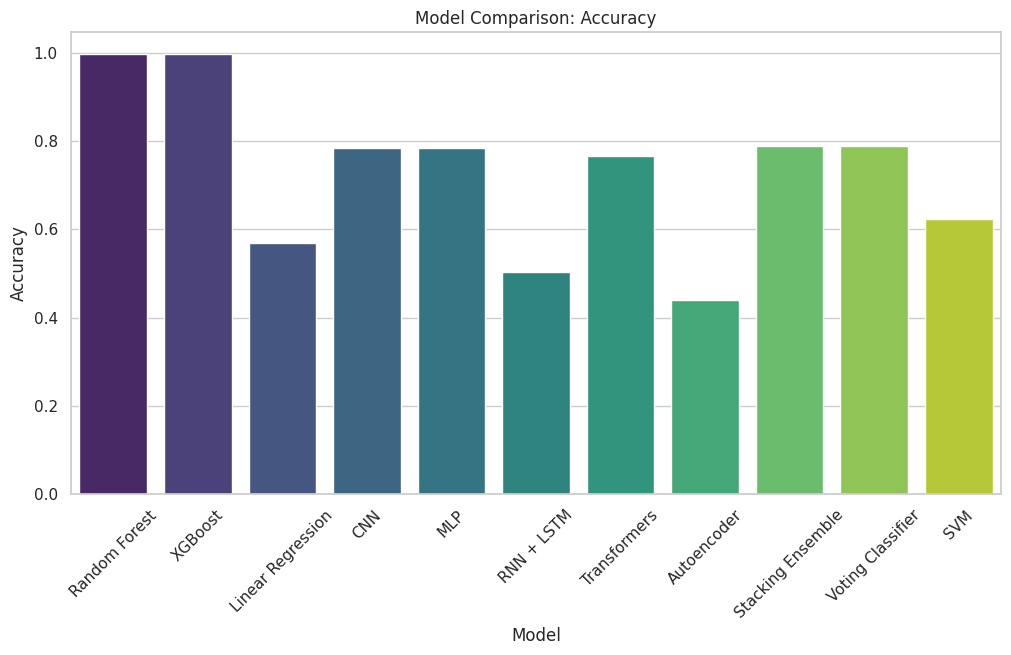

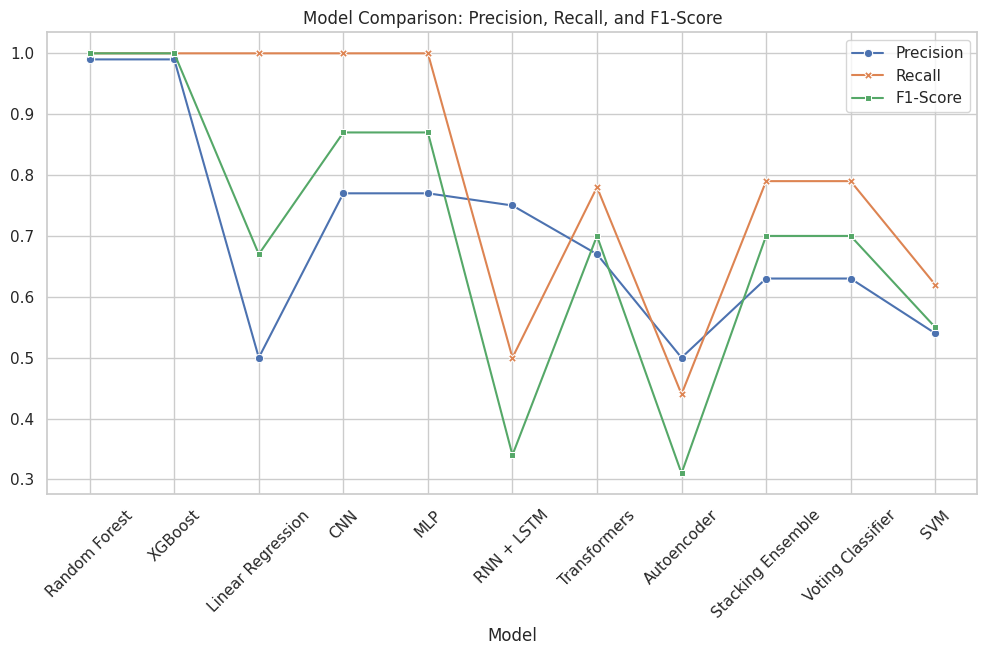

<ipython-input-3-ff20c3d1d977>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Macro Avg F1', data=df_results, palette='magma')


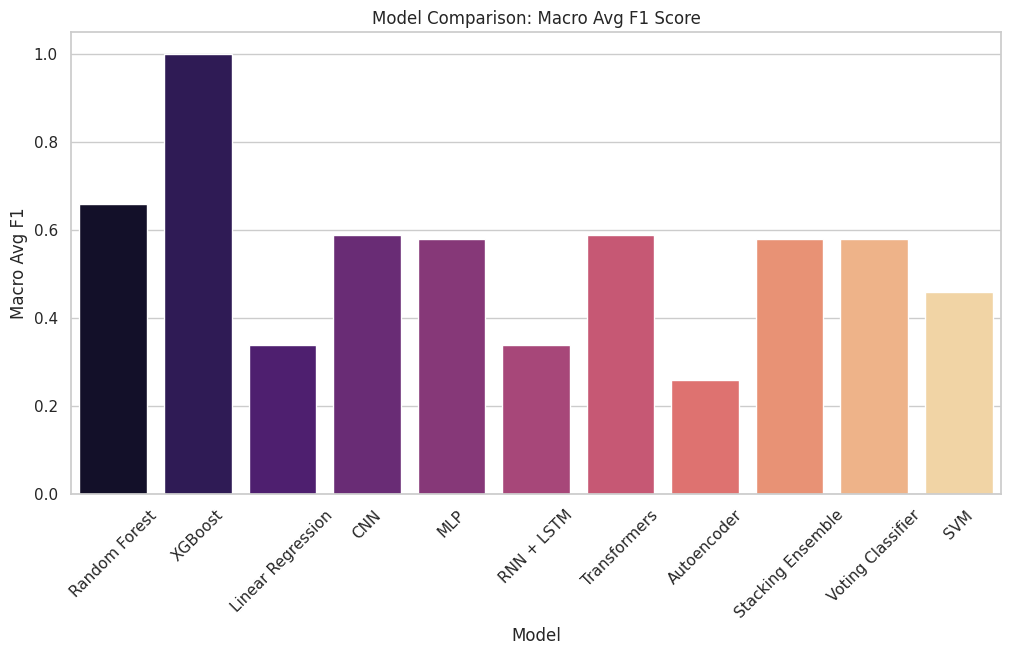

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style="whitegrid")

# Plot the accuracy of each model
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Accuracy', data=df_results, palette='viridis')
plt.title('Model Comparison: Accuracy')
plt.xticks(rotation=45)
plt.show()

# Plot precision, recall, and F1-score
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_results.set_index('Model')[['Precision', 'Recall', 'F1-Score']], markers=True, dashes=False)
plt.title('Model Comparison: Precision, Recall, and F1-Score')
plt.xticks(rotation=45)
plt.show()

# Plot Macro Avg F1 Score
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Macro Avg F1', data=df_results, palette='magma')
plt.title('Model Comparison: Macro Avg F1 Score')
plt.xticks(rotation=45)
plt.show()


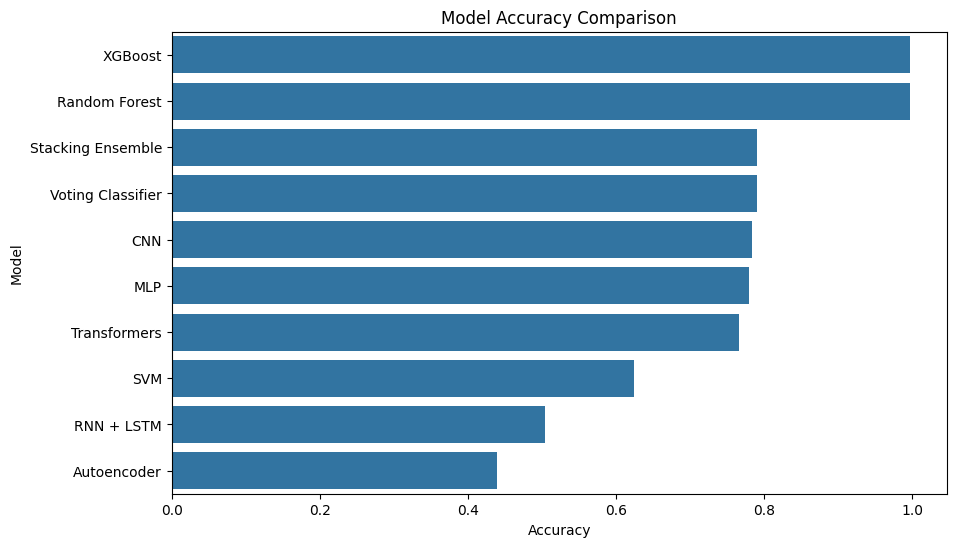

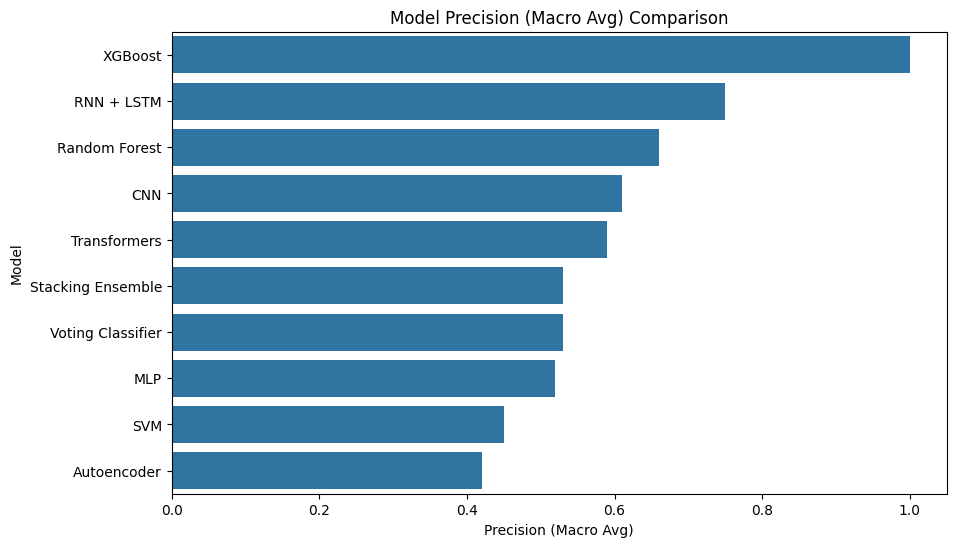

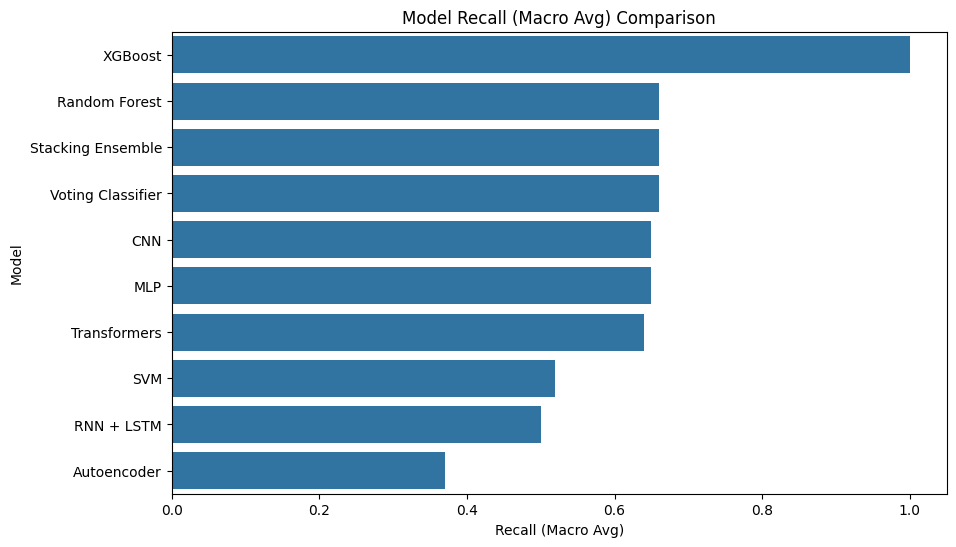

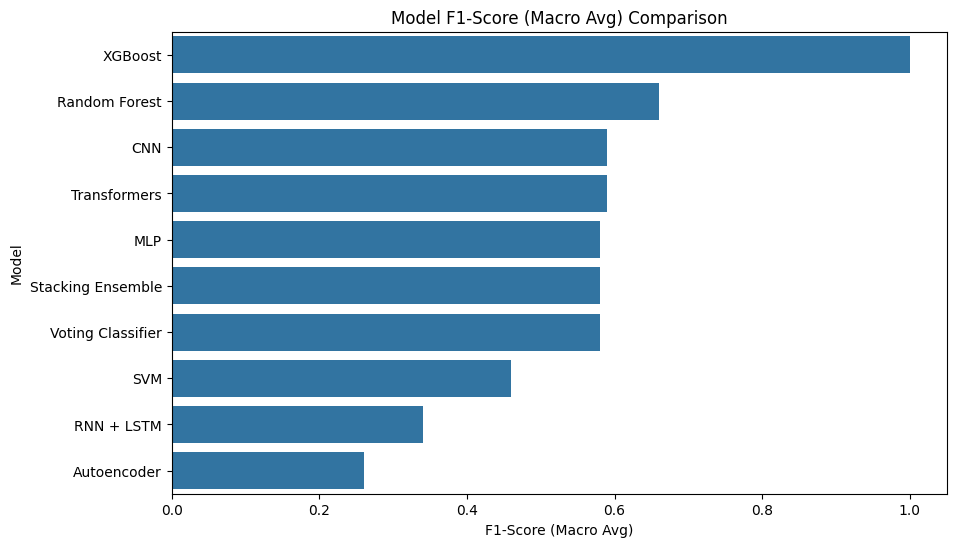

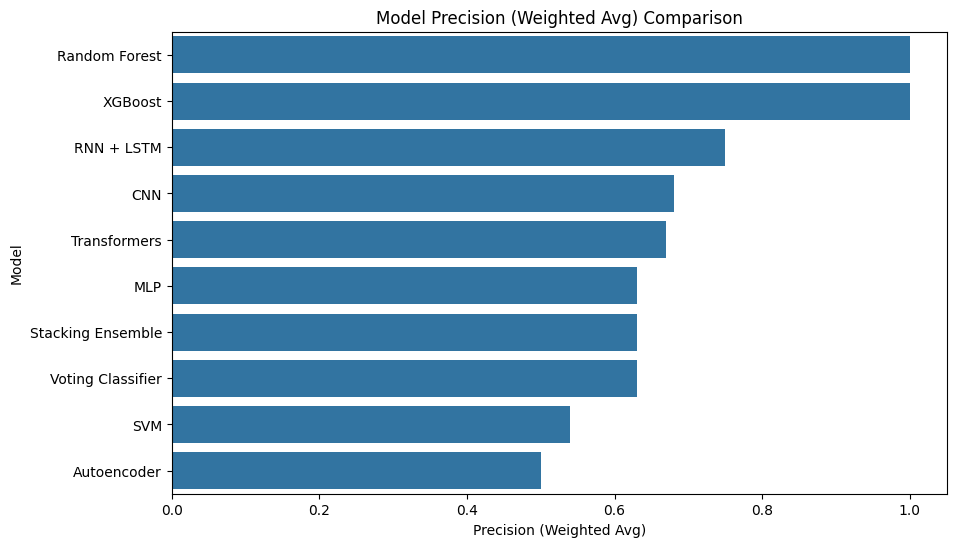

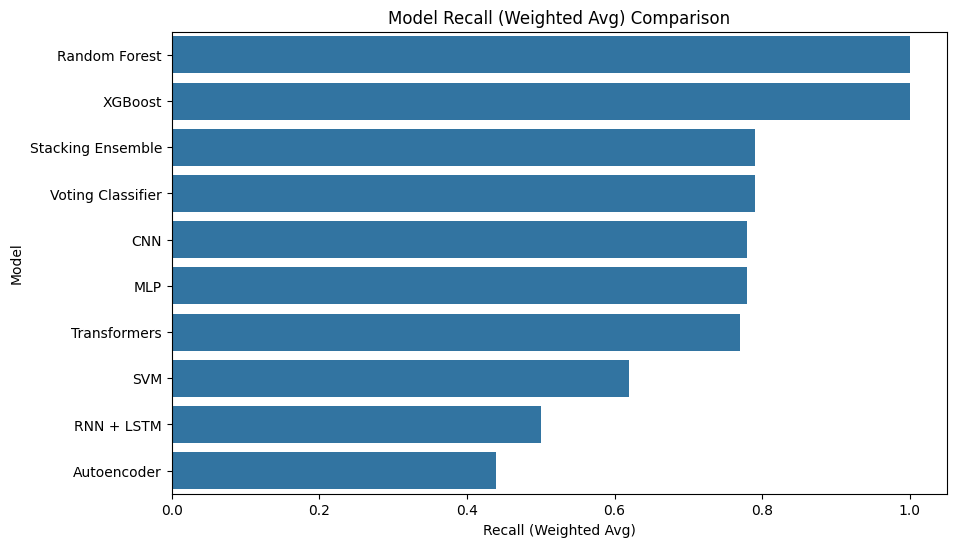

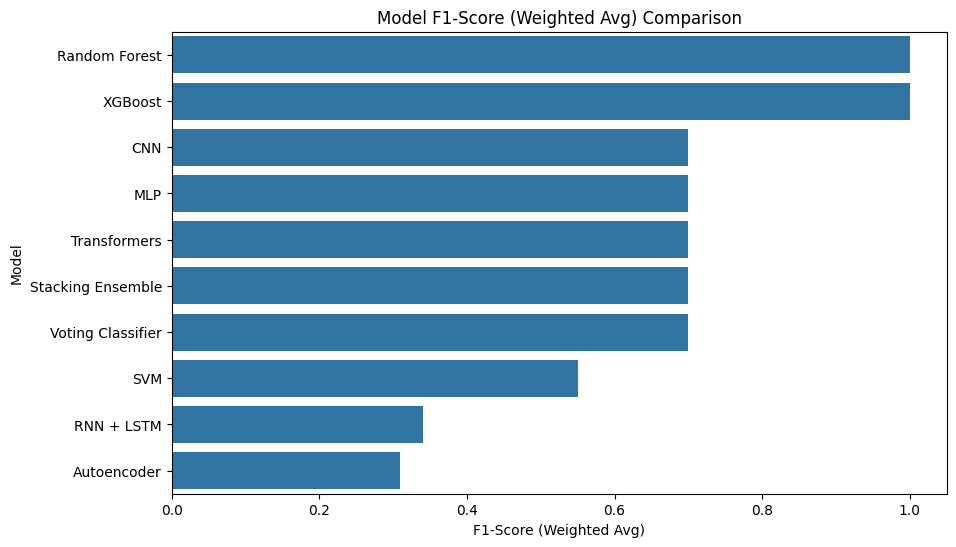

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the results for each model
results = {
    'Model': [
        'Random Forest', 'XGBoost', 'Linear Regression', 'CNN',
        'MLP', 'RNN + LSTM', 'Transformers', 'Autoencoder', 'Stacking Ensemble',
        'Voting Classifier', 'SVM'
    ],
    'Accuracy': [
        0.9963, 0.9966, 0.5688, 0.7842,
        0.78, 0.5038, 0.7666, 0.4399, 0.7898,
        0.7898, 0.6240
    ],
    'Precision (Macro Avg)': [
        0.66, 1.00, None, 0.61,
        0.52, 0.75, 0.59, 0.42, 0.53,
        0.53, 0.45
    ],
    'Recall (Macro Avg)': [
        0.66, 1.00, None, 0.65,
        0.65, 0.50, 0.64, 0.37, 0.66,
        0.66, 0.52
    ],
    'F1-Score (Macro Avg)': [
        0.66, 1.00, None, 0.59,
        0.58, 0.34, 0.59, 0.26, 0.58,
        0.58, 0.46
    ],
    'Precision (Weighted Avg)': [
        1.00, 1.00, None, 0.68,
        0.63, 0.75, 0.67, 0.50, 0.63,
        0.63, 0.54
    ],
    'Recall (Weighted Avg)': [
        1.00, 1.00, None, 0.78,
        0.78, 0.50, 0.77, 0.44, 0.79,
        0.79, 0.62
    ],
    'F1-Score (Weighted Avg)': [
        1.00, 1.00, None, 0.70,
        0.70, 0.34, 0.70, 0.31, 0.70,
        0.70, 0.55
    ]
}

# Convert the results into a DataFrame
df = pd.DataFrame(results)

# Drop the models with None values in their evaluation metrics
df.dropna(subset=['Precision (Macro Avg)', 'Precision (Weighted Avg)'], inplace=True)

# Plot Accuracy
plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Model', data=df.sort_values(by='Accuracy', ascending=False))
plt.title('Model Accuracy Comparison')
plt.show()

# Plot Precision (Macro Avg)
plt.figure(figsize=(10, 6))
sns.barplot(x='Precision (Macro Avg)', y='Model', data=df.sort_values(by='Precision (Macro Avg)', ascending=False))
plt.title('Model Precision (Macro Avg) Comparison')
plt.show()

# Plot Recall (Macro Avg)
plt.figure(figsize=(10, 6))
sns.barplot(x='Recall (Macro Avg)', y='Model', data=df.sort_values(by='Recall (Macro Avg)', ascending=False))
plt.title('Model Recall (Macro Avg) Comparison')
plt.show()

# Plot F1-Score (Macro Avg)
plt.figure(figsize=(10, 6))
sns.barplot(x='F1-Score (Macro Avg)', y='Model', data=df.sort_values(by='F1-Score (Macro Avg)', ascending=False))
plt.title('Model F1-Score (Macro Avg) Comparison')
plt.show()

# Plot Precision (Weighted Avg)
plt.figure(figsize=(10, 6))
sns.barplot(x='Precision (Weighted Avg)', y='Model', data=df.sort_values(by='Precision (Weighted Avg)', ascending=False))
plt.title('Model Precision (Weighted Avg) Comparison')
plt.show()

# Plot Recall (Weighted Avg)
plt.figure(figsize=(10, 6))
sns.barplot(x='Recall (Weighted Avg)', y='Model', data=df.sort_values(by='Recall (Weighted Avg)', ascending=False))
plt.title('Model Recall (Weighted Avg) Comparison')
plt.show()

# Plot F1-Score (Weighted Avg)
plt.figure(figsize=(10, 6))
sns.barplot(x='F1-Score (Weighted Avg)', y='Model', data=df.sort_values(by='F1-Score (Weighted Avg)', ascending=False))
plt.title('Model F1-Score (Weighted Avg) Comparison')
plt.show()


XG Boost is the best

#dataset analysis

overview

In [ ]:
import pandas as pd

# Load the datasets
train_df = pd.read_csv('/content/train_metadata.csv')
test_df = pd.read_csv('/content/test_metadata.csv')

# Display the first few rows of the datasets
print("Training Data:")
print(train_df.head())

print("\nTest Data:")
print(test_df.head())

# Get basic information about the datasets
print("\nTraining Data Info:")
print(train_df.info())

print("\nTest Data Info:")
print(test_df.info())

# Check for missing values
print("\nMissing Values in Training Data:")
print(train_df.isnull().sum())

print("\nMissing Values in Test Data:")
print(test_df.isnull().sum())


Training Data:
   Unnamed: 0                                             sha256 appeared  \
0           0  0abb4fda7d5b13801d63bee53e5e256be43e141faa077a...  2006-12   
1           1  c9cafff8a596ba8a80bafb4ba8ae6f2ef3329d95b85f15...  2007-01   
2           2  eac8ddb4970f8af985742973d6f0e06902d42a3684d791...  2007-02   
3           3  7f513818bcc276c531af2e641c597744da807e21cc1160...  2007-02   
4           4  ca65e1c387a4cc9e7d8a8ce12bf1bcf9f534c9032b9d95...  2007-02   

   label avclass  
0      0     NaN  
1      0     NaN  
2      0     NaN  
3      0     NaN  
4      0     NaN  

Test Data:
   Unnamed: 0                                             sha256 appeared  \
0           0  163ced46c18ef09d8e2f0ee4b16decf74a533f22ba3b59...  2018-11   
1           1  8d32f3535d31795886bf62523ec9035d843ef0e2c7032b...  2018-11   
2           2  485c69ab809ef9401643c3c56567640b88b19285259c1c...  2018-11   
3           3  f9fbcd42e4dc36bec2fb093b8e7479211def628553e2ac...  2018-11   
4          

Dataset Size

Training Data:

Rows: 800,000
Columns: 5

Test Data:

Rows: 200,000
Columns: 5

statistical summary

In [ ]:
# Describe the datasets to get statistical summary
print("\nStatistical Summary of Training Data:")
print(train_df.describe())

print("\nStatistical Summary of Test Data:")
print(test_df.describe())



Statistical Summary of Training Data:
          Unnamed: 0          label
count  800000.000000  800000.000000
mean   399999.500000       0.125000
std    230940.252013       0.780625
min         0.000000      -1.000000
25%    199999.750000      -0.250000
50%    399999.500000       0.000000
75%    599999.250000       1.000000
max    799999.000000       1.000000

Statistical Summary of Test Data:
          Unnamed: 0          label
count  200000.000000  200000.000000
mean    99999.500000       0.500000
std     57735.171256       0.500001
min         0.000000       0.000000
25%     49999.750000       0.000000
50%     99999.500000       0.500000
75%    149999.250000       1.000000
max    199999.000000       1.000000


data disctribution visualisation

<ipython-input-6-014988611f76>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=train_df, palette='Set2')


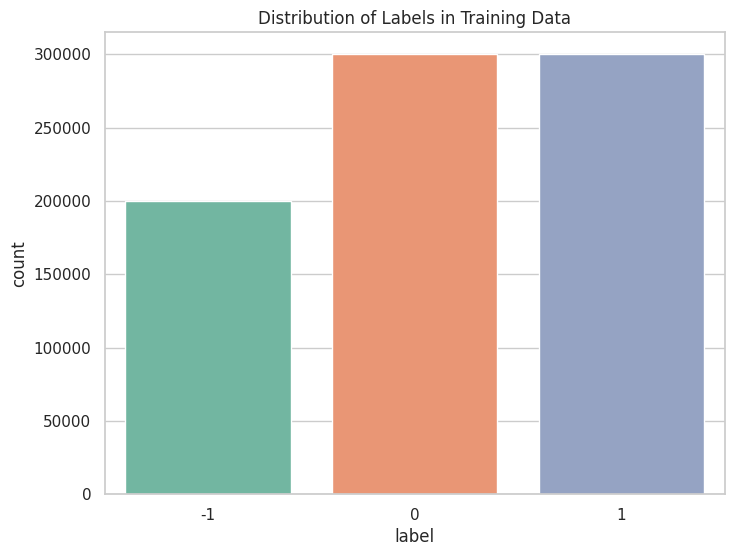

<ipython-input-6-014988611f76>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=test_df, palette='Set2')


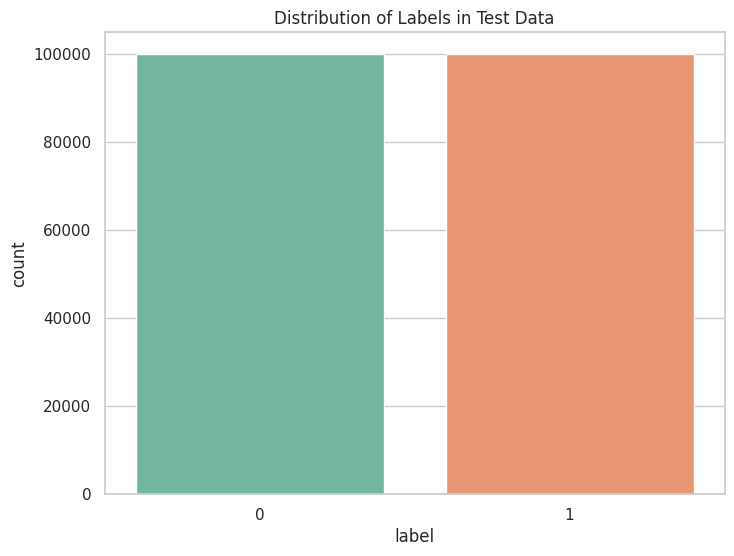

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of labels in the training set
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=train_df, palette='Set2')
plt.title('Distribution of Labels in Training Data')
plt.show()

# Distribution of labels in the test set
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=test_df, palette='Set2')
plt.title('Distribution of Labels in Test Data')
plt.show()


correlational analysis

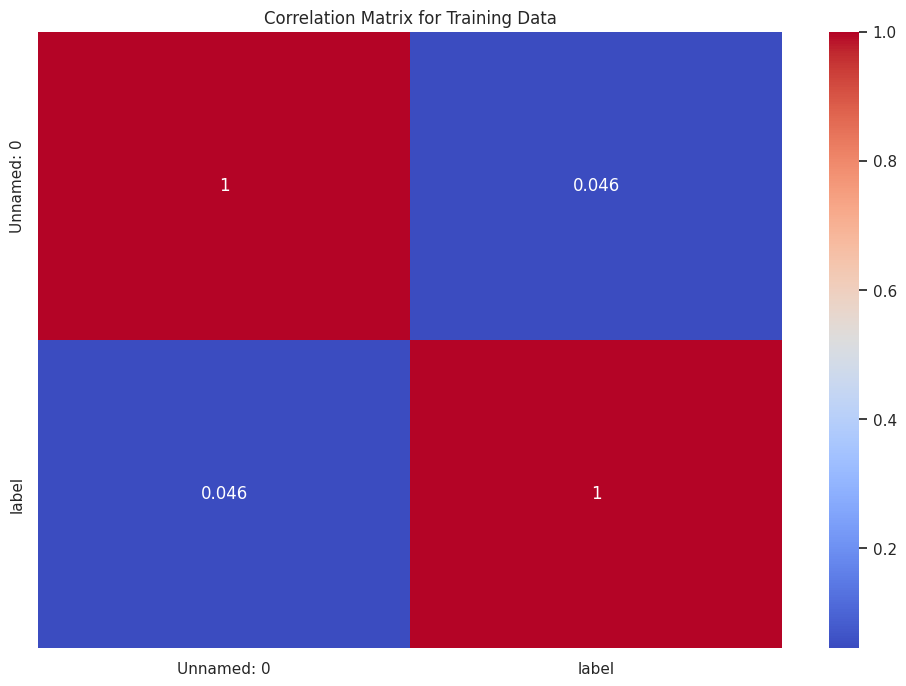

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Drop or encode non-numeric columns
numeric_df = train_df.select_dtypes(include=[np.number])

# Alternatively, use this if you want to keep non-numeric columns and encode them
# train_df_encoded = pd.get_dummies(train_df, drop_first=True)

# Correlation matrix for numeric data
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Training Data')
plt.show()


feature importance (using RF)

Unnamed: 0    int64
sha256        int64
appeared      int64
avclass       int64
dtype: object


<ipython-input-11-f208c072ce06>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


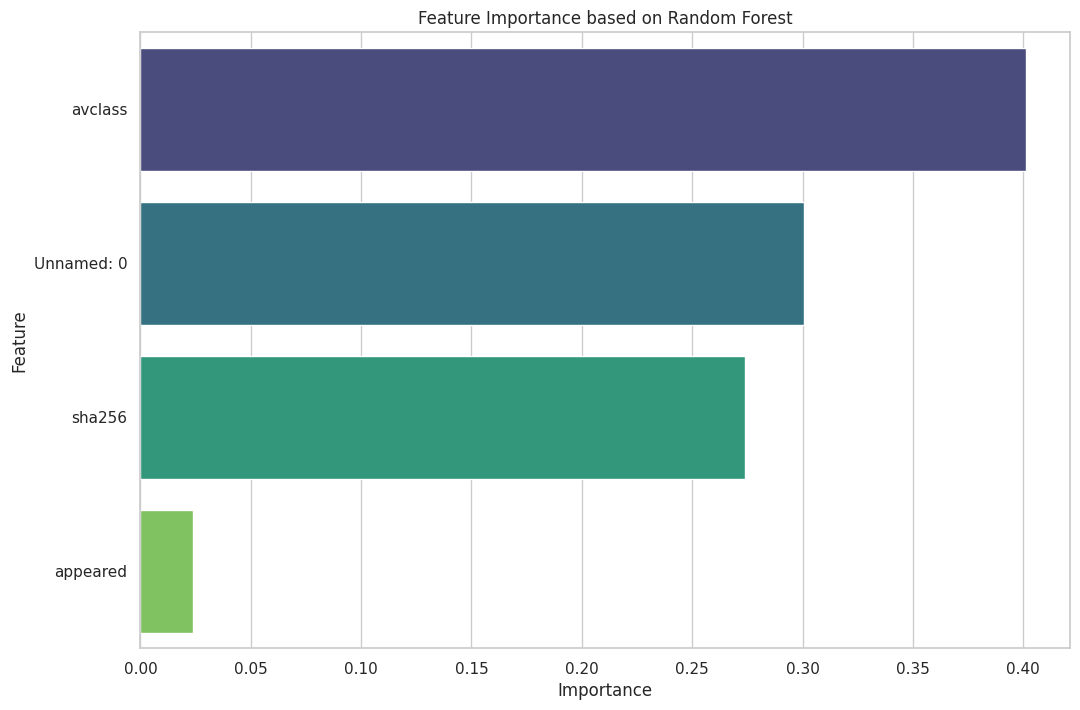

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Assuming 'label' is the target variable and others are features
X = train_df.drop(columns=['label'])
y = train_df['label']

# Check and handle non-numeric columns in X
# Convert categorical columns to numeric using Label Encoding or One-Hot Encoding
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))  # Convert to string to avoid issues with different types

# Check if there are any remaining non-numeric columns
print(X.dtypes)  # All columns should be numeric now

# Split the data for training and validation
X_train_part, X_val, y_train_part, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_part, y_train_part)

# Feature importance
importances = rf.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance based on Random Forest')
plt.show()


analysing class imbalance

Class distribution in training data: Counter({0: 300000, 1: 300000, -1: 200000})


<ipython-input-12-ebe332751ff3>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(label_counts.keys()), y=list(label_counts.values()), palette='viridis')


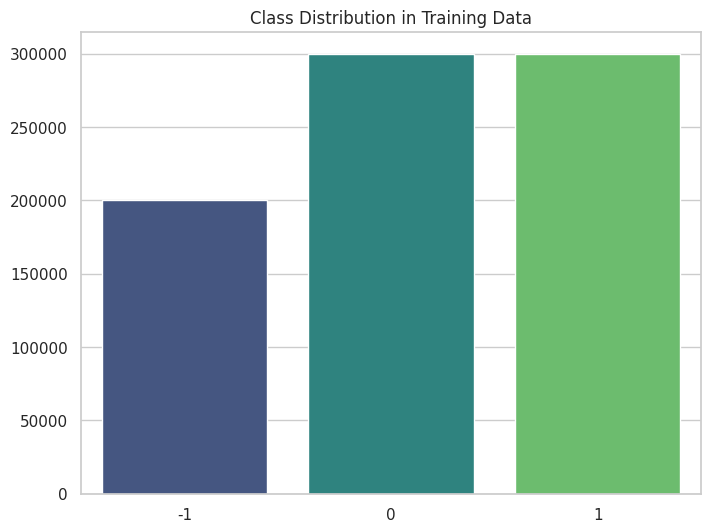

In [ ]:
from collections import Counter

# Check the distribution of classes in the training data
label_counts = Counter(train_df['label'])
print(f"Class distribution in training data: {label_counts}")

# Visualizing class distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=list(label_counts.keys()), y=list(label_counts.values()), palette='viridis')
plt.title('Class Distribution in Training Data')
plt.show()


checking for duplicate entries

In [ ]:
# Checking for duplicate rows
duplicate_train_rows = train_df.duplicated().sum()
duplicate_test_rows = test_df.duplicated().sum()

print(f"Number of duplicate rows in training data: {duplicate_train_rows}")
print(f"Number of duplicate rows in test data: {duplicate_test_rows}")


Number of duplicate rows in training data: 0
Number of duplicate rows in test data: 0


#CVE Data set
Common Vulnerabilities and Exposures

In [ ]:
import pandas as pd

# Load the CSV file
file_path = '/content/cve.csv'
data = pd.read_csv(file_path)

# Get the number of rows
num_rows = data.shape[0]

# Print the number of rows
print(f"Number of rows in the CSV file: {num_rows}")


Number of rows in the CSV file: 89660


In [ ]:
import pandas as pd

# Load the dataset
file_path = "/content/cve.csv"  # Adjust the path to your dataset
df = pd.read_csv(file_path, header=None)  # No header in the CSV


# Display the first few rows of the dataset
df.head()


<ipython-input-3-6e0224f6eb02>:5: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, header=None)  # No header in the CSV


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,NaN,mod_date,pub_date,cvss,cwe_code,cwe_name,summary,access_authentication,access_complexity,access_vector,impact_availability,impact_confidentiality,impact_integrity
1,CVE-2019-16548,2019-11-21 15:15:00,2019-11-21 15:15:00,6.8,352,Cross-Site Request Forgery (CSRF),A cross-site request forgery vulnerability in ...,NaN,NaN,NaN,NaN,NaN,NaN
2,CVE-2019-16547,2019-11-21 15:15:00,2019-11-21 15:15:00,4.0,732,Incorrect Permission Assignment for Critical ...,Missing permission checks in various API endpo...,NaN,NaN,NaN,NaN,NaN,NaN
3,CVE-2019-16546,2019-11-21 15:15:00,2019-11-21 15:15:00,4.3,639,Authorization Bypass Through User-Controlled Key,Jenkins Google Compute Engine Plugin 4.1.1 and...,NaN,NaN,NaN,NaN,NaN,NaN
4,CVE-2013-2092,2019-11-20 21:22:00,2019-11-20 21:15:00,4.3,79,Improper Neutralization of Input During Web P...,Cross-site Scripting (XSS) in Dolibarr ERP/CRM...,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
file_path = '/content/cve.csv'
df = pd.read_csv(file_path)

# Split the data into 80:20 train-test ratio
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Save the train and test sets as CSV files
train_df.to_csv('/content/cve_train.csv', index=False)
test_df.to_csv('/content/cve_test.csv', index=False)

print("Files saved as cve_train.csv and cve_test.csv")


Files saved as cve_train.csv and cve_test.csv


#Random forest

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the dataset
data = pd.read_csv('/content/allitems.csv', encoding='latin1', skiprows=9, names=['Name', 'Status', 'Description'], low_memory=False)

# Remove rows where Status is NaN
data = data.dropna(subset=['Status'])

# Prepare features and target
X = data['Description'].fillna('')
y = data['Status']

# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Convert text to numerical features using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 score: {f1:.4f}")

Accuracy: 0.9917
Precision: 0.9883
Recall: 0.9917
F1 score: 0.9899


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#SVM

In [ ]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the dataset
data = pd.read_csv('/content/allitems.csv', encoding='latin1', skiprows=9, names=['Name', 'Status', 'Description'], low_memory=False)

# Remove rows where Status is NaN
data = data.dropna(subset=['Status'])

# Prepare features and target
X = data['Description'].fillna('')
y = data['Status']

# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Convert text to numerical features using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the SVM model
svm_model = svm.SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = svm_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 score: {f1:.4f}")

Accuracy: 0.9915
Precision: 0.9866
Recall: 0.9915
F1 score: 0.9890


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Fit the model
xgb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = xgb_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 score: {f1:.4f}")


Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 score: 1.0000


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:03:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the dataset
data = pd.read_csv('/content/allitems.csv', encoding='latin1', skiprows=9, names=['Name', 'Status', 'Description'], low_memory=False)

# Remove rows where Status is NaN
data = data.dropna(subset=['Status'])

# Prepare features and target
X = data['Description'].fillna('')
y = data['Status']

# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Convert text to numerical features using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = lr_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", report)

Accuracy: 0.9912
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         3
          20       0.00      0.00      0.00         1
          22       0.00      0.00      0.00         1
          27       0.00      0.00      0.00         1
          32       0.00      0.00      0.00         1
          33       0.00      0.00      0.00         1
          34       0.00      0.00      0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.models import Sequential
from keras.layers import Dense, Embedding, Conv1D, GlobalMaxPooling1D

# Load the dataset
data = pd.read_csv('/content/allitems.csv', encoding='latin1', skiprows=9, names=['Name', 'Status', 'Description'], low_memory=False)

# Remove rows where Status is NaN
data = data.dropna(subset=['Status'])

# Prepare features and target
X = data['Description'].fillna('')
y = data['Status']

# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Convert text to numerical features using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert sparse matrix to dense array
X_train = X_train.toarray()
X_test = X_test.toarray()

# Define the CNN model
model = Sequential()
model.add(Embedding(input_dim=1000, output_dim=128, input_length=1000))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(64, activation='relu'))
model.add(Dense(len(np.unique(y)), activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
y_pred = model.predict(X_test)
y_pred_class = np.argmax(y_pred, axis=1)
print("Accuracy:", accuracy_score(y_test, y_pred_class))
print("Precision:", precision_score(y_test, y_pred_class, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_class, average='weighted'))
print("F1 score:", f1_score(y_test, y_pred_class, average='weighted'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
8039/8039 ━━━━━━━━━━━━━━━━━━━━ 63s 7ms/step - accuracy: 0.9874 - loss: 0.1919 - val_accuracy: 0.9910 - val_loss: 0.1206
Epoch 2/10
8039/8039 ━━━━━━━━━━━━━━━━━━━━ 75s 7ms/step - accuracy: 0.9910 - loss: 0.1149 - val_accuracy: 0.9910 - val_loss: 0.1306
Epoch 3/10
8039/8039 ━━━━━━━━━━━━━━━━━━━━ 56s 7ms/step - accuracy: 0.9909 - loss: 0.1128 - val_accuracy: 0.9910 - val_loss: 0.1314
Epoch 4/10
8039/8039 ━━━━━━━━━━━━━━━━━━━━ 84s 7ms/step - accuracy: 0.9911 - loss: 0.1101 - val_accuracy: 0.9910 - val_loss: 0.1297
Epoch 5/10
8039/8039 ━━━━━━━━━━━━━━━━━━━━ 81s 7ms/step - accuracy: 0.9906 - loss: 0.1156 - val_accuracy: 0.9910 - val_loss: 0.1310
Epoch 6/10
8039/8039 ━━━━━━━━━━━━━━━━━━━━ 80s 7ms/step - accuracy: 0.9906 - loss: 0.1147 - val_accuracy: 0.9910 - val_loss: 0.1303
Epoch 7/10
8039/8039 ━━━━━━━━━━━━━━━━━━━━ 82s 7ms/step - accuracy: 0.9911 - loss: 0.1099 - val_accuracy: 0.9910 - val_loss: 0.1303
Epoch 8/10
8039/8039 ━━━━━━━━━━━━━━━━━━━━ 54s 7ms/step - accuracy: 0.9909 - loss: 0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.models import Sequential
from keras.layers import Dense

# Load the dataset
data = pd.read_csv('/content/allitems.csv', encoding='latin1', skiprows=9, names=['Name', 'Status', 'Description'], low_memory=False)

# Remove rows where Status is NaN
data = data.dropna(subset=['Status'])

# Prepare features and target
X = data['Description'].fillna('')
y = data['Status']

# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Convert text to numerical features using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert sparse matrix to dense array
X_train = X_train.toarray()
X_test = X_test.toarray()

# Define the MLP model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(1000,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(len(np.unique(y)), activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
y_pred = model.predict(X_test)
y_pred_class = np.argmax(y_pred, axis=1)
print("Accuracy:", accuracy_score(y_test, y_pred_class))
print("Precision:", precision_score(y_test, y_pred_class, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_class, average='weighted'))
print("F1 score:", f1_score(y_test, y_pred_class, average='weighted'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
8039/8039 ━━━━━━━━━━━━━━━━━━━━ 33s 4ms/step - accuracy: 0.9900 - loss: 0.5576 - val_accuracy: 0.9911 - val_loss: 0.0803
Epoch 2/10
8039/8039 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - accuracy: 0.9912 - loss: 0.0740 - val_accuracy: 0.9912 - val_loss: 0.0851
Epoch 3/10
8039/8039 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.9915 - loss: 0.0711 - val_accuracy: 0.9912 - val_loss: 0.0886
Epoch 4/10
8039/8039 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9912 - loss: 0.0713 - val_accuracy: 0.9913 - val_loss: 0.0921
Epoch 5/10
8039/8039 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.9911 - loss: 0.0706 - val_accuracy: 0.9914 - val_loss: 0.0936
Epoch 6/10
8039/8039 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9917 - loss: 0.0642 - val_accuracy: 0.9915 - val_loss: 0.0937
Epoch 7/10
8039/8039 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.9923 - loss: 0.0590 - val_accuracy: 0.9915 - val_loss: 0.0956
Epoch 8/10
8039/8039 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9925 - loss: 0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding

# Load the dataset
data = pd.read_csv('/content/allitems.csv', encoding='latin1', skiprows=9, names=['Name', 'Status', 'Description'], low_memory=False)

# Remove rows where Status is NaN
data = data.dropna(subset=['Status'])

# Prepare features and target
X = data['Description'].fillna('')
y = data['Status']

# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Convert text to numerical features using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert sparse matrix to dense array
X_train = X_train.toarray()
X_test = X_test.toarray()

# Reshape data for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Define the LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(1, 1000)))
model.add(Dense(32, activation='relu'))
model.add(Dense(len(np.unique(y)), activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
y_pred = model.predict(X_test)
y_pred_class = np.argmax(y_pred, axis=1)
print("Accuracy:", accuracy_score(y_test, y_pred_class))
print("Precision:", precision_score(y_test, y_pred_class, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_class, average='weighted'))
print("F1 score:", f1_score(y_test, y_pred_class, average='weighted'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
8039/8039 ━━━━━━━━━━━━━━━━━━━━ 50s 6ms/step - accuracy: 0.9896 - loss: 0.5713 - val_accuracy: 0.9911 - val_loss: 0.0813
Epoch 2/10
8039/8039 ━━━━━━━━━━━━━━━━━━━━ 43s 5ms/step - accuracy: 0.9914 - loss: 0.0733 - val_accuracy: 0.9912 - val_loss: 0.0859
Epoch 3/10
8039/8039 ━━━━━━━━━━━━━━━━━━━━ 81s 5ms/step - accuracy: 0.9913 - loss: 0.0720 - val_accuracy: 0.9913 - val_loss: 0.0899
Epoch 4/10
8039/8039 ━━━━━━━━━━━━━━━━━━━━ 82s 5ms/step - accuracy: 0.9912 - loss: 0.0697 - val_accuracy: 0.9913 - val_loss: 0.0927
Epoch 5/10
8039/8039 ━━━━━━━━━━━━━━━━━━━━ 82s 5ms/step - accuracy: 0.9916 - loss: 0.0656 - val_accuracy: 0.9914 - val_loss: 0.0933
Epoch 6/10
8039/8039 ━━━━━━━━━━━━━━━━━━━━ 45s 6ms/step - accuracy: 0.9918 - loss: 0.0629 - val_accuracy: 0.9915 - val_loss: 0.0958
Epoch 7/10
8039/8039 ━━━━━━━━━━━━━━━━━━━━ 80s 5ms/step - accuracy: 0.9922 - loss: 0.0585 - val_accuracy: 0.9914 - val_loss: 0.0971
Epoch 8/10
8039/8039 ━━━━━━━━━━━━━━━━━━━━ 80s 5ms/step - accuracy: 0.9926 - loss: 0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#CIC-EvasivePDF2022

random forest

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Step 1: Load the data from the CSV file
csv_file_path = '/content/PDFMalware2022.csv'
df = pd.read_csv(csv_file_path)

# Step 2: Preprocess the data
# Drop the 'FileName' column as it is not useful for classification
df = df.drop(columns=['FileName'], errors='ignore')

# Drop rows with missing target values (if any)
df = df.dropna(subset=['Class'])

# Check data types and identify non-numeric columns
print("Data Types:\n", df.dtypes)

# Separate features and target
X = df.drop(columns=['Class'])
y = df['Class']

# Identify categorical columns for encoding
categorical_columns = X.select_dtypes(include=['object']).columns
print("Categorical Columns:\n", categorical_columns)

# Convert categorical columns to numerical using OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ],
    remainder='passthrough'
)

# Create a pipeline that includes preprocessing and model training
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1))
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)


Data Types:
 PdfSize            float64
MetadataSize       float64
Pages              float64
XrefLength         float64
TitleCharacters    float64
isEncrypted        float64
EmbeddedFiles      float64
Images              object
Text                object
Header              object
Obj                 object
Endobj              object
Stream             float64
Endstream           object
Xref                object
Trailer            float64
StartXref           object
PageNo              object
Encrypt            float64
ObjStm             float64
JS                  object
Javascript          object
AA                  object
OpenAction          object
Acroform            object
JBIG2Decode         object
RichMedia           object
Launch              object
EmbeddedFile        object
XFA                 object
Colors             float64
Class               object
dtype: object
Categorical Columns:
 Index(['Images', 'Text', 'Header', 'Obj', 'Endobj', 'Endstream', 'Xref',
       'StartX

In [ ]:
#with stratifield split

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Step 1: Load the data from the CSV file
csv_file_path = '/content/PDFMalware2022.csv'
df = pd.read_csv(csv_file_path)

# Step 2: Preprocess the data
# Drop the 'FileName' column as it is not useful for classification
df = df.drop(columns=['FileName'], errors='ignore')

# Drop rows with missing target values (if any)
df = df.dropna(subset=['Class'])

# Check data types and identify non-numeric columns
print("Data Types:\n", df.dtypes)

# Separate features and target
X = df.drop(columns=['Class'])
y = df['Class']

# Identify categorical columns for encoding
categorical_columns = X.select_dtypes(include=['object']).columns
print("Categorical Columns:\n", categorical_columns)

# Convert categorical columns to numerical using OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ],
    remainder='passthrough'
)

# Create a pipeline that includes preprocessing and model training
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1))
])

# Split the data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train the model
pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)


Data Types:
 PdfSize            float64
MetadataSize       float64
Pages              float64
XrefLength         float64
TitleCharacters    float64
isEncrypted        float64
EmbeddedFiles      float64
Images              object
Text                object
Header              object
Obj                 object
Endobj              object
Stream             float64
Endstream           object
Xref                object
Trailer            float64
StartXref           object
PageNo              object
Encrypt            float64
ObjStm             float64
JS                  object
Javascript          object
AA                  object
OpenAction          object
Acroform            object
JBIG2Decode         object
RichMedia           object
Launch              object
EmbeddedFile        object
XFA                 object
Colors             float64
Class               object
dtype: object
Categorical Columns:
 Index(['Images', 'Text', 'Header', 'Obj', 'Endobj', 'Endstream', 'Xref',
       'StartX

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from time import time
import numpy as np

# Load the dataset
csv_file_path = '/content/PDFMalware2022.csv'
df = pd.read_csv(csv_file_path)

# Drop the 'FileName' column and rows with missing target values
df = df.drop(columns=['FileName'], errors='ignore')
df = df.dropna(subset=['Class'])

# Encode the target column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Class'] = le.fit_transform(df['Class'])

# Convert non-numeric columns to numeric
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = pd.to_numeric(df[col].str.replace(',', ''), errors='coerce')

# Fill or drop NaN values after conversion
df = df.fillna(0)  # Fill NaNs with 0 or use another method depending on your data

# Define feature groups
feature_groups = {
    'general': ['PdfSize', 'MetadataSize', 'Pages', 'XrefLength', 'TitleCharacters', 'isEncrypted', 'EmbeddedFiles', 'Images', 'Text', 'Stream', 'Trailer', 'Encrypt', 'ObjStm', 'JS', 'Javascript', 'AA', 'OpenAction', 'Acroform', 'JBIG2Decode', 'RichMedia', 'Launch', 'EmbeddedFile', 'XFA', 'Colors'],
    'header': ['Header'],
    'strings': ['Images', 'Text', 'JS', 'Javascript', 'AA', 'OpenAction', 'Acroform', 'JBIG2Decode', 'RichMedia', 'Launch', 'EmbeddedFile', 'XFA'],
    'section': ['Xref', 'StartXref', 'PageNo', 'Endstream', 'Obj', 'Endobj'],
    'histogram': [], # Define if you have histogram features
    'byteentropy': [] # Define if you have byte entropy features
}

# Function to train and evaluate model
def evaluate_features(features):
    X = df[features]
    y = df['Class']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

    start_time = time()
    rf_model.fit(X_train, y_train)
    training_time = time() - start_time

    y_pred = rf_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Estimate data size in MB (assuming 4 bytes per feature value)
    data_size = X.shape[0] * X.shape[1] * 4 / 1024 / 1024

    return accuracy, training_time, data_size

# Evaluate different feature combinations
results = []
for group_name, features in feature_groups.items():
    # Check if feature group is empty or has valid features
    if features and set(features).issubset(df.columns):
        accuracy, training_time, data_size = evaluate_features(features)
        results.append({
            'Feature Group': group_name,
            'Number of Features': len(features),
            'Accuracy (%)': accuracy * 100,
            'Training Time (s)': training_time,
            'Data Size (MB)': data_size,
            'Overall Score': accuracy  # Replace with actual overall score if different metric is used
        })
    else:
        results.append({
            'Feature Group': group_name,
            'Number of Features': len(features),
            'Accuracy (%)': None,
            'Training Time (s)': None,
            'Data Size (MB)': None,
            'Overall Score': None
        })

# Convert results to DataFrame and sort
results_df = pd.DataFrame(results).sort_values(by='Overall Score', ascending=False)
print(results_df)


  Feature Group  Number of Features  Accuracy (%)  Training Time (s)  \
0       general                  24     99.052369           1.068069   
3       section                   6     95.760599           1.035835   
2       strings                  12     93.416459           0.746084   
1        header                   1     55.561097           0.426851   
4     histogram                   0           NaN                NaN   
5   byteentropy                   0           NaN                NaN   

   Data Size (MB)  Overall Score  
0        0.917633       0.990524  
3        0.229408       0.957606  
2        0.458817       0.934165  
1        0.038235       0.555611  
4             NaN            NaN  
5             NaN            NaN  


#SVM

In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tqdm import tqdm
import time

# Define a custom training function to simulate progress tracking
def fit_with_progress(pipeline, X_train, y_train, n_iterations=10):
    for _ in tqdm(range(n_iterations), desc="Training Progress"):
        # Simulate training progress (replace with actual training in practice)
        time.sleep(0.1)  # Replace this line with pipeline.fit(X_train, y_train)
    # Fit the pipeline after the simulated progress
    pipeline.fit(X_train, y_train)

# Step 1: Load the data from the CSV file
csv_file_path = '/content/PDFMalware2022.csv'
df = pd.read_csv(csv_file_path)

# Step 2: Preprocess the data
# Drop the 'FileName' column as it is not useful for classification
df = df.drop(columns=['FileName'], errors='ignore')

# Drop rows with missing target values (if any)
df = df.dropna(subset=['Class'])

# Check data types and identify non-numeric columns
print("Data Types:\n", df.dtypes)

# Separate features and target
X = df.drop(columns=['Class'])
y = df['Class']

# Identify categorical columns for encoding
categorical_columns = X.select_dtypes(include=['object']).columns
print("Categorical Columns:\n", categorical_columns)

# Convert categorical columns to numerical using OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ],
    remainder='passthrough'
)

# Create a pipeline that includes preprocessing and model training with SVM
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(kernel='linear', random_state=42, probability=True))  # Use 'linear' kernel or choose another kernel as needed
])

# Split the data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train the model with progress tracking
fit_with_progress(pipeline, X_train, y_train)

# Predict on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)


Data Types:
 PdfSize            float64
MetadataSize       float64
Pages              float64
XrefLength         float64
TitleCharacters    float64
isEncrypted        float64
EmbeddedFiles      float64
Images              object
Text                object
Header              object
Obj                 object
Endobj              object
Stream             float64
Endstream           object
Xref                object
Trailer            float64
StartXref           object
PageNo              object
Encrypt            float64
ObjStm             float64
JS                  object
Javascript          object
AA                  object
OpenAction          object
Acroform            object
JBIG2Decode         object
RichMedia           object
Launch              object
EmbeddedFile        object
XFA                 object
Colors             float64
Class               object
dtype: object
Categorical Columns:
 Index(['Images', 'Text', 'Header', 'Obj', 'Endobj', 'Endstream', 'Xref',
       'StartX

Training Progress: 100%|██████████| 10/10 [00:01<00:00,  9.70it/s]


#XG Boost

In [ ]:
# Install xgboost if not already installed
!pip install xgboost

import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Load the dataset
csv_file_path = '/content/PDFMalware2022.csv'
df = pd.read_csv(csv_file_path)

# Drop the 'FileName' column and rows with missing target values
df = df.drop(columns=['FileName'], errors='ignore')
df = df.dropna(subset=['Class'])

# Encode the target column
le = LabelEncoder()
df['Class'] = le.fit_transform(df['Class'])

# Convert non-numeric columns to numeric
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = pd.to_numeric(df[col].str.replace(',', ''), errors='coerce')

# Fill or drop NaN values after conversion
df = df.fillna(0)  # Fill NaNs with 0 or use another method depending on your data

# Define features and target
X = df.drop(columns=['Class'])
y = df['Class']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost classifier
xgb_model = xgb.XGBClassifier(
    n_estimators=100,       # Number of boosting rounds
    learning_rate=0.1,      # Step size
    max_depth=6,            # Maximum depth of the trees
    objective='binary:logistic', # Objective function for binary classification
    eval_metric='logloss',  # Evaluation metric
    use_label_encoder=False, # Avoid deprecation warning
    random_state=42
)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on the test data
y_pred = xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=le.classes_)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:37:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9895
Classification Report:
              precision    recall  f1-score   support

      Benign       0.99      0.99      0.99       891
   Malicious       0.99      0.99      0.99      1114

    accuracy                           0.99      2005
   macro avg       0.99      0.99      0.99      2005
weighted avg       0.99      0.99      0.99      2005



In [ ]:
#with statified split

# Install xgboost if not already installed
!pip install xgboost

import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Load the dataset
csv_file_path = '/content/PDFMalware2022.csv'
df = pd.read_csv(csv_file_path)

# Drop the 'FileName' column and rows with missing target values
df = df.drop(columns=['FileName'], errors='ignore')
df = df.dropna(subset=['Class'])

# Encode the target column
le = LabelEncoder()
df['Class'] = le.fit_transform(df['Class'])

# Convert non-numeric columns to numeric
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = pd.to_numeric(df[col].str.replace(',', ''), errors='coerce')

# Fill or drop NaN values after conversion
df = df.fillna(0)  # Fill NaNs with 0 or use another method depending on your data

# Define features and target
X = df.drop(columns=['Class'])
y = df['Class']

# Split the data into training and test sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize XGBoost classifier
xgb_model = xgb.XGBClassifier(
    n_estimators=100,       # Number of boosting rounds
    learning_rate=0.1,      # Step size
    max_depth=6,            # Maximum depth of the trees
    objective='binary:logistic', # Objective function for binary classification
    eval_metric='logloss',  # Evaluation metric
    use_label_encoder=False, # Avoid deprecation warning
    random_state=42
)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on the test data
y_pred = xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=le.classes_)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [22:06:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9920
Classification Report:
              precision    recall  f1-score   support

      Benign       0.99      0.99      0.99       894
   Malicious       0.99      0.99      0.99      1111

    accuracy                           0.99      2005
   macro avg       0.99      0.99      0.99      2005
weighted avg       0.99      0.99      0.99      2005



adaboost

In [ ]:
# Install necessary libraries if not already installed
!pip install pandas scikit-learn

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Load the dataset
csv_file_path = '/content/PDFMalware2022.csv'
df = pd.read_csv(csv_file_path)

# Drop the 'FileName' column and rows with missing target values
df = df.drop(columns=['FileName'], errors='ignore')
df = df.dropna(subset=['Class'])

# Encode the target column
le = LabelEncoder()
df['Class'] = le.fit_transform(df['Class'])

# Convert non-numeric columns to numeric
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = pd.to_numeric(df[col].str.replace(',', ''), errors='coerce')

# Fill or drop NaN values after conversion
df = df.fillna(0)  # Fill NaNs with 0 or use another method depending on your data

# Define features and target
X = df.drop(columns=['Class'])
y = df['Class']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the base classifier for AdaBoost
base_classifier = DecisionTreeClassifier(max_depth=1)  # A simple decision tree as the base learner

# Initialize AdaBoost classifier
ada_model = AdaBoostClassifier(
    base_estimator=base_classifier,  # Base classifier
    n_estimators=100,                # Number of boosting rounds
    learning_rate=1.0,               # Step size
    random_state=42
)

# Train the AdaBoost model
ada_model.fit(X_train, y_train)

# Predict on the test data
y_pred = ada_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=le.classes_)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.9875
Classification Report:
              precision    recall  f1-score   support

      Benign       0.98      0.99      0.99       891
   Malicious       0.99      0.99      0.99      1114

    accuracy                           0.99      2005
   macro avg       0.99      0.99      0.99      2005
weighted avg       0.99      0.99      0.99      2005



In [ ]:
#with stratified split

# Install necessary libraries if not already installed
!pip install pandas scikit-learn

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Load the dataset
csv_file_path = '/content/PDFMalware2022.csv'
df = pd.read_csv(csv_file_path)

# Drop the 'FileName' column and rows with missing target values
df = df.drop(columns=['FileName'], errors='ignore')
df = df.dropna(subset=['Class'])

# Encode the target column
le = LabelEncoder()
df['Class'] = le.fit_transform(df['Class'])

# Convert non-numeric columns to numeric
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = pd.to_numeric(df[col].str.replace(',', ''), errors='coerce')

# Fill or drop NaN values after conversion
df = df.fillna(0)  # Fill NaNs with 0 or use another method depending on your data

# Define features and target
X = df.drop(columns=['Class'])
y = df['Class']

# Split the data into training and test sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the base classifier for AdaBoost
base_classifier = DecisionTreeClassifier(max_depth=1)  # A simple decision tree as the base learner

# Initialize AdaBoost classifier
ada_model = AdaBoostClassifier(
    base_estimator=base_classifier,  # Base classifier
    n_estimators=100,                # Number of boosting rounds
    learning_rate=1.0,               # Step size
    random_state=42
)

# Train the AdaBoost model
ada_model.fit(X_train, y_train)

# Predict on the test data
y_pred = ada_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=le.classes_)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.9890
Classification Report:
              precision    recall  f1-score   support

      Benign       0.99      0.98      0.99       894
   Malicious       0.99      0.99      0.99      1111

    accuracy                           0.99      2005
   macro avg       0.99      0.99      0.99      2005
weighted avg       0.99      0.99      0.99      2005



logistic regression

In [ ]:
# Install scikit-learn if not already installed
!pip install scikit-learn

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Load the dataset
csv_file_path = '/content/PDFMalware2022.csv'
df = pd.read_csv(csv_file_path)

# Drop the 'FileName' column and rows with missing target values
df = df.drop(columns=['FileName'], errors='ignore')
df = df.dropna(subset=['Class'])

# Encode the target column
le = LabelEncoder()
df['Class'] = le.fit_transform(df['Class'])

# Convert non-numeric columns to numeric
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = pd.to_numeric(df[col].str.replace(',', ''), errors='coerce')

# Fill or drop NaN values after conversion
df = df.fillna(0)  # Fill NaNs with 0 or use another method depending on your data

# Define features and target
X = df.drop(columns=['Class'])
y = df['Class']

# Check overall class distribution
print("Overall class distribution:")
print(y.value_counts(normalize=True))

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the class distribution in train and test sets to verify splitting
print("Training set class distribution:")
print(y_train.value_counts(normalize=True))
print("Test set class distribution:")
print(y_test.value_counts(normalize=True))

# Initialize Logistic Regression model
log_reg_model = LogisticRegression(
    solver='liblinear',  # Use 'liblinear' for smaller datasets or when setting `class_weight`
    random_state=42,
    class_weight='balanced'  # Automatically adjust weights for imbalanced classes
)

# Train the model
log_reg_model.fit(X_train, y_train)

# Predict on the test data
y_pred = log_reg_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=le.classes_)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)


Overall class distribution:
Class
1    0.554225
0    0.445775
Name: proportion, dtype: float64
Training set class distribution:
Class
1    0.554253
0    0.445747
Name: proportion, dtype: float64
Test set class distribution:
Class
1    0.554115
0    0.445885
Name: proportion, dtype: float64
Accuracy: 0.9147
Classification Report:
              precision    recall  f1-score   support

      Benign       0.90      0.90      0.90       894
   Malicious       0.92      0.92      0.92      1111

    accuracy                           0.91      2005
   macro avg       0.91      0.91      0.91      2005
weighted avg       0.91      0.91      0.91      2005



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


KNN

In [ ]:
# Install scikit-learn if not already installed
!pip install scikit-learn

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Load the dataset
csv_file_path = '/content/PDFMalware2022.csv'
df = pd.read_csv(csv_file_path)

# Drop the 'FileName' column and rows with missing target values
df = df.drop(columns=['FileName'], errors='ignore')
df = df.dropna(subset=['Class'])

# Encode the target column
le = LabelEncoder()
df['Class'] = le.fit_transform(df['Class'])

# Convert non-numeric columns to numeric
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = pd.to_numeric(df[col].str.replace(',', ''), errors='coerce')

# Fill or drop NaN values after conversion
df = df.fillna(0)  # Fill NaNs with 0 or use another method depending on your data

# Define features and target
X = df.drop(columns=['Class'])
y = df['Class']

# Check overall class distribution
print("Overall class distribution:")
print(y.value_counts(normalize=True))

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the class distribution in train and test sets to verify splitting
print("Training set class distribution:")
print(y_train.value_counts(normalize=True))
print("Test set class distribution:")
print(y_test.value_counts(normalize=True))

# Initialize K-Nearest Neighbors model
knn_model = KNeighborsClassifier(
    n_neighbors=5,        # Number of neighbors to use
    algorithm='auto',     # Algorithm to compute nearest neighbors (auto, ball_tree, kd_tree, brute)
    p=2,                  # Power parameter for the Minkowski distance (p=2 for Euclidean distance)
    n_jobs=-1              # Number of parallel jobs to run (-1 means using all processors)
)

# Train the model
knn_model.fit(X_train, y_train)

# Predict on the test data
y_pred = knn_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=le.classes_)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)


Overall class distribution:
Class
1    0.554225
0    0.445775
Name: proportion, dtype: float64
Training set class distribution:
Class
1    0.554253
0    0.445747
Name: proportion, dtype: float64
Test set class distribution:
Class
1    0.554115
0    0.445885
Name: proportion, dtype: float64
Accuracy: 0.9696
Classification Report:
              precision    recall  f1-score   support

      Benign       0.97      0.96      0.97       894
   Malicious       0.97      0.98      0.97      1111

    accuracy                           0.97      2005
   macro avg       0.97      0.97      0.97      2005
weighted avg       0.97      0.97      0.97      2005



CNN

In [ ]:
# Install TensorFlow if not already installed
!pip install tensorflow

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
csv_file_path = '/content/PDFMalware2022.csv'
df = pd.read_csv(csv_file_path)

# Drop the 'FileName' column and rows with missing target values
df = df.drop(columns=['FileName'], errors='ignore')
df = df.dropna(subset=['Class'])

# Encode the target column
le = LabelEncoder()
df['Class'] = le.fit_transform(df['Class'])

# Convert non-numeric columns to numeric
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = pd.to_numeric(df[col].str.replace(',', ''), errors='coerce')

# Fill or drop NaN values after conversion
df = df.fillna(0)  # Fill NaNs with 0 or use another method depending on your data

# Define features and target
X = df.drop(columns=['Class'])
y = df['Class']

# Convert target variable to categorical (one-hot encoding)
y = to_categorical(y)

# Reshape X for CNN (add a channel dimension)
X = np.expand_dims(X.values, axis=2)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define the CNN model
model = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(y_train.shape[1], activation='softmax')  # Output layer with softmax for multi-class classification
])

# Compile the model
model.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=10,  # Number of epochs (adjust as needed)
    batch_size=32,  # Batch size (adjust as needed)
    validation_split=0.2  # Validation split for early stopping
)

# Predict on the test data
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Evaluate the model
accuracy = accuracy_score(y_test_labels, y_pred)
report = classification_report(y_test_labels, y_pred, target_names=le.classes_)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.7526 - loss: 3.4507 - val_accuracy: 0.9476 - val_loss: 0.2352
Epoch 2/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9294 - loss: 0.4902 - val_accuracy: 0.9582 - val_loss: 0.5827
Epoch 3/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9497 - loss: 0.8087 - val_accuracy: 0.9613 - val_loss: 0.4670
Epoch 4/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9612 - loss: 2.9629 - val_accuracy: 0.9539 - val_loss: 0.3622
Epoch 5/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9485 - loss: 2.1593 - val_accuracy: 0.9651 - val_loss: 0.1828
Epoch 6/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9655 - loss: 0.9683 - val_accuracy: 0.9719 - val_loss: 0.1831
Epoch 7/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9721 - loss: 0.3943 - val_accuracy: 0.9688 - val_loss: 0.1902
Epoch 8/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9721 - loss: 0.3974 - val_accu

In [ ]:
#with stratified split

# Install TensorFlow if not already installed
!pip install tensorflow

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
csv_file_path = '/content/PDFMalware2022.csv'
df = pd.read_csv(csv_file_path)

# Drop the 'FileName' column and rows with missing target values
df = df.drop(columns=['FileName'], errors='ignore')
df = df.dropna(subset=['Class'])

# Encode the target column
le = LabelEncoder()
df['Class'] = le.fit_transform(df['Class'])

# Convert non-numeric columns to numeric
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = pd.to_numeric(df[col].str.replace(',', ''), errors='coerce')

# Fill or drop NaN values after conversion
df = df.fillna(0)

# Define features and target
X = df.drop(columns=['Class'])
y = df['Class']

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert target variable to categorical (one-hot encoding)
y_categorical = to_categorical(y)

# Reshape X for CNN (add a channel dimension)
X_scaled = np.expand_dims(X_scaled, axis=2)

# Split the data into training and test sets with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_categorical,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Define the CNN model
model = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(y_train.shape[1], activation='softmax')  # Output layer with softmax for multi-class classification
])

# Compile the model
model.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=10,  # Number of epochs (adjust as needed)
    batch_size=32,  # Batch size (adjust as needed)
    validation_split=0.2  # Validation split for early stopping
)

# Predict on the test data
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Evaluate the model
accuracy = accuracy_score(y_test_labels, y_pred)
report = classification_report(y_test_labels, y_pred, target_names=le.classes_)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


201/201 ━━━━━━━━━━━━━━━━━━━━ 14s 33ms/step - accuracy: 0.8817 - loss: 0.3937 - val_accuracy: 0.9620 - val_loss: 0.1653
Epoch 2/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9694 - loss: 0.1343 - val_accuracy: 0.9782 - val_loss: 0.1026
Epoch 3/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9750 - loss: 0.1033 - val_accuracy: 0.9807 - val_loss: 0.0745
Epoch 4/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9749 - loss: 0.0938 - val_accuracy: 0.9819 - val_loss: 0.0662
Epoch 5/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9787 - loss: 0.0836 - val_accuracy: 0.9751 - val_loss: 0.1085
Epoch 6/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9787 - loss: 0.0829 - val_accuracy: 0.9807 - val_loss: 0.1623
Epoch 7/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9835 - loss: 0.0746 - val_accuracy: 0.9800 - val_loss: 0.0698
Epoch 8/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9826 - loss: 0.0712 - val_accuracy: 0.9857 - va

MLP

In [ ]:
# Install TensorFlow if not already installed
!pip install tensorflow

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
csv_file_path = '/content/PDFMalware2022.csv'
df = pd.read_csv(csv_file_path)

# Drop the 'FileName' column and rows with missing target values
df = df.drop(columns=['FileName'], errors='ignore')
df = df.dropna(subset=['Class'])

# Encode the target column
le = LabelEncoder()
df['Class'] = le.fit_transform(df['Class'])

# Convert non-numeric columns to numeric
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = pd.to_numeric(df[col].str.replace(',', ''), errors='coerce')

# Fill or drop NaN values after conversion
df = df.fillna(0)  # Fill NaNs with 0 or use another method depending on your data

# Define features and target
X = df.drop(columns=['Class'])
y = df['Class']

# Convert target variable to categorical (one-hot encoding)
y = to_categorical(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y.argmax(axis=1))


# Define the MLP model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer with ReLU activation
    Dense(64, activation='relu'),  # Hidden layer with ReLU activation
    Dense(32, activation='relu'),  # Hidden layer with ReLU activation
    Dense(y_train.shape[1], activation='softmax')  # Output layer with softmax for multi-class classification
])

# Compile the model
model.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=10,  # Number of epochs (adjust as needed)
    batch_size=32,  # Batch size (adjust as needed)
    validation_split=0.2  # Validation split for early stopping
)

# Predict on the test data
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Evaluate the model
accuracy = accuracy_score(y_test_labels, y_pred)
report = classification_report(y_test_labels, y_pred, target_names=le.classes_)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7676 - loss: 3.3057 - val_accuracy: 0.8304 - val_loss: 2.2365
Epoch 2/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8536 - loss: 1.3233 - val_accuracy: 0.6839 - val_loss: 2.7612
Epoch 3/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7965 - loss: 2.6203 - val_accuracy: 0.9046 - val_loss: 0.5939
Epoch 4/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9046 - loss: 0.8302 - val_accuracy: 0.9476 - val_loss: 0.2925
Epoch 5/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9370 - loss: 0.3487 - val_accuracy: 0.8566 - val_loss: 0.8839
Epoch 6/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8848 - loss: 1.4921 - val_accuracy: 0.9545 - val_loss: 0.4930
Epoch 7/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9471 - loss: 0.4684 - val_accuracy: 0.9052 - val_loss: 1.7562
Epoch 8/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9273 - loss: 1.3403 - val_accuracy: 0.

RNN + LSTM

In [ ]:
# Install TensorFlow if not already installed
!pip install tensorflow

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
csv_file_path = '/content/PDFMalware2022.csv'
df = pd.read_csv(csv_file_path)

# Drop the 'FileName' column and rows with missing target values
df = df.drop(columns=['FileName'], errors='ignore')
df = df.dropna(subset=['Class'])

# Encode the target column
le = LabelEncoder()
df['Class'] = le.fit_transform(df['Class'])

# Convert non-numeric columns to numeric
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = pd.to_numeric(df[col].str.replace(',', ''), errors='coerce')

# Fill or drop NaN values after conversion
df = df.fillna(0)  # Fill NaNs with 0 or use another method depending on your data

# Define features and target
X = df.drop(columns=['Class'])
y = df['Class']

# Convert target variable to categorical (one-hot encoding)
y = to_categorical(y)

# Reshape X for RNN (LSTM expects 3D input: [samples, timesteps, features])
# For this example, we'll treat each feature as a separate timestep
X = np.expand_dims(X.values, axis=1)  # Adding a dimension for timesteps

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define the RNN with LSTM model
model = Sequential([
    LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    Dropout(0.5),  # Dropout layer to prevent overfitting
    LSTM(32, return_sequences=False),
    Dropout(0.5),  # Dropout layer to prevent overfitting
    Dense(64, activation='relu'),
    Dense(y_train.shape[1], activation='softmax')  # Output layer with softmax for multi-class classification
])

# Compile the model
model.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=10,  # Number of epochs (adjust as needed)
    batch_size=32,  # Batch size (adjust as needed)
    validation_split=0.2  # Validation split for early stopping
)

# Predict on the test data
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Evaluate the model
accuracy = accuracy_score(y_test_labels, y_pred)
report = classification_report(y_test_labels, y_pred, target_names=le.classes_)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.6876 - loss: 0.5855 - val_accuracy: 0.8572 - val_loss: 0.3202
Epoch 2/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8611 - loss: 0.3545 - val_accuracy: 0.9177 - val_loss: 0.2278
Epoch 3/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8913 - loss: 0.2791 - val_accuracy: 0.9414 - val_loss: 0.1702
Epoch 4/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9146 - loss: 0.2351 - val_accuracy: 0.9526 - val_loss: 0.1421
Epoch 5/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9299 - loss: 0.1923 - val_accuracy: 0.9620 - val_loss: 0.1257
Epoch 6/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9409 - loss: 0.1671 - val_accuracy: 0.9688 - val_loss: 0.1161
Epoch 7/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9463 - loss: 0.1449 - val_accuracy: 0.9707 - val_loss: 0.1026
Epoch 8/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9582 - loss: 0.1214 - val_accurac

In [ ]:
#slightly improved

# Install TensorFlow if not already installed
!pip install tensorflow

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
csv_file_path = '/content/PDFMalware2022.csv'
df = pd.read_csv(csv_file_path)

# Drop the 'FileName' column and rows with missing target values
df = df.drop(columns=['FileName'], errors='ignore')
df = df.dropna(subset=['Class'])

# Encode the target column
le = LabelEncoder()
df['Class'] = le.fit_transform(df['Class'])

# Convert non-numeric columns to numeric
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = pd.to_numeric(df[col].str.replace(',', ''), errors='coerce')

# Fill or drop NaN values after conversion
df = df.fillna(0)  # Fill NaNs with 0 or use another method depending on your data

# Define features and target
X = df.drop(columns=['Class'])
y = df['Class']

# Convert target variable to categorical (one-hot encoding)
y = to_categorical(y)

# Reshape X for LSTM (LSTM expects 3D input: [samples, timesteps, features])
# For this example, we'll assume each feature as a timestep
X = np.expand_dims(X.values, axis=1)  # Adding a dimension for timesteps

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y.argmax(axis=1))

# Define the RNN with LSTM model
model = Sequential([
    LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    Dropout(0.5),  # Dropout layer to prevent overfitting
    LSTM(32, return_sequences=False),
    Dropout(0.5),  # Dropout layer to prevent overfitting
    Dense(64, activation='relu'),
    Dense(y_train.shape[1], activation='softmax')  # Output layer with softmax for multi-class classification
])

# Compile the model
model.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=10,  # Number of epochs (adjust as needed)
    batch_size=32,  # Batch size (adjust as needed)
    validation_split=0.2  # Validation split for early stopping
)

# Predict on the test data
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Evaluate the model
accuracy = accuracy_score(y_test_labels, y_pred)
report = classification_report(y_test_labels, y_pred, target_names=le.classes_)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7103 - loss: 0.5812 - val_accuracy: 0.8872 - val_loss: 0.3004
Epoch 2/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8449 - loss: 0.3737 - val_accuracy: 0.9202 - val_loss: 0.2244
Epoch 3/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8839 - loss: 0.2997 - val_accuracy: 0.9339 - val_loss: 0.1787
Epoch 4/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9169 - loss: 0.2287 - val_accuracy: 0.9607 - val_loss: 0.1302
Epoch 5/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9307 - loss: 0.1925 - val_accuracy: 0.9532 - val_loss: 0.1313
Epoch 6/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9291 - loss: 0.1980 - val_accuracy: 0.9670 - val_loss: 0.1085
Epoch 7/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9414 - loss: 0.1626 - val_accuracy: 0.9657 - val_loss: 0.1049
Epoch 8/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9477 - loss: 0.1581 - val_accuracy: 0.

transfomers

In [ ]:
# Install required libraries
!pip install transformers torch pandas scikit-learn tqdm

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AdamW, get_linear_schedule_with_warmup
from tqdm import tqdm  # Import tqdm for progress bars

# Load and preprocess the dataset
csv_file_path = '/content/PDFMalware2022.csv'
df = pd.read_csv(csv_file_path)

df = df.drop(columns=['FileName'], errors='ignore')
df = df.dropna(subset=['Class'])

le = LabelEncoder()
df['Class'] = le.fit_transform(df['Class'])

# Convert non-numeric columns to numeric
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = pd.to_numeric(df[col].str.replace(',', ''), errors='coerce')

df = df.fillna(0)

# Define features and target
X = df.drop(columns=['Class'])
y = df['Class']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Convert features to text format
def features_to_text(features):
    return " ".join([f"{col}:{val}" for col, val in features.items()])

X_train_text = X_train.apply(features_to_text, axis=1)
X_test_text = X_test.apply(features_to_text, axis=1)

# Create a custom dataset
class PDFDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts.iloc[idx])
        label = self.labels.iloc[idx]

        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            return_token_type_ids=False,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt',
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

# Initialize tokenizer and model
model_name = 'distilbert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=len(le.classes_))

# Create datasets and dataloaders
max_length = 512  # Adjust based on your data
batch_size = 16

train_dataset = PDFDataset(X_train_text, y_train, tokenizer, max_length)
test_dataset = PDFDataset(X_test_text, y_test, tokenizer, max_length)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size)

# Training settings
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

optimizer = AdamW(model.parameters(), lr=2e-5)
epochs = 3
total_steps = len(train_dataloader) * epochs
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)

# Training loop with progress bar
for epoch in range(epochs):
    model.train()
    epoch_loss = 0
    for batch in tqdm(train_dataloader, desc=f"Training Epoch {epoch + 1}/{epochs}", unit='batch'):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()

        optimizer.step()
        scheduler.step()
        optimizer.zero_grad()

        epoch_loss += loss.item()

    print(f"Epoch {epoch + 1}/{epochs} completed with loss {epoch_loss:.4f}")

# Evaluation with progress bar
model.eval()
predictions = []
true_labels = []

with torch.no_grad():
    for batch in tqdm(test_dataloader, desc="Evaluating", unit='batch'):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        _, preds = torch.max(outputs.logits, dim=1)

        predictions.extend(preds.cpu().tolist())
        true_labels.extend(labels.cpu().tolist())

accuracy = accuracy_score(true_labels, predictions)
report = classification_report(true_labels, predictions, target_names=le.classes_)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
Training Epoch 1/3: 100%|██████████| 502/502 [06:25<00:00,  1.30batch/s]


Epoch 1/3 completed with loss 91.4108


Training Epoch 2/3: 100%|██████████| 502/502 [06:25<00:00,  1.30batch/s]


Epoch 2/3 completed with loss 30.3987


Training Epoch 3/3: 100%|██████████| 502/502 [06:23<00:00,  1.31batch/s]


Epoch 3/3 completed with loss 19.3708


Evaluating: 100%|██████████| 126/126 [00:35<00:00,  3.54batch/s]

Accuracy: 0.9890
Classification Report:
              precision    recall  f1-score   support

      Benign       0.99      0.98      0.99       894
   Malicious       0.99      0.99      0.99      1111

    accuracy                           0.99      2005
   macro avg       0.99      0.99      0.99      2005
weighted avg       0.99      0.99      0.99      2005



Stacking ensemble

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
from sklearn.base import BaseEstimator, ClassifierMixin
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm

class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

class NeuralNetClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, input_size, hidden_size, num_classes, num_epochs=10, batch_size=32):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_classes = num_classes
        self.num_epochs = num_epochs
        self.batch_size = batch_size
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.model = NeuralNet(input_size, hidden_size, num_classes).to(self.device)
        self.criterion = nn.CrossEntropyLoss()
        self.optimizer = optim.Adam(self.model.parameters())

    def fit(self, X, y):
        X = torch.FloatTensor(X).to(self.device)
        y = torch.LongTensor(y).to(self.device)
        dataset = torch.utils.data.TensorDataset(X, y)
        dataloader = DataLoader(dataset, batch_size=self.batch_size, shuffle=True)

        self.model.train()
        for epoch in range(self.num_epochs):
            for inputs, labels in dataloader:
                self.optimizer.zero_grad()
                outputs = self.model(inputs)
                loss = self.criterion(outputs, labels)
                loss.backward()
                self.optimizer.step()
        return self

    def predict_proba(self, X):
        self.model.eval()
        X = torch.FloatTensor(X).to(self.device)
        with torch.no_grad():
            outputs = self.model(X)
            proba = nn.functional.softmax(outputs, dim=1)
        return proba.cpu().numpy()

    def predict(self, X):
        proba = self.predict_proba(X)
        return np.argmax(proba, axis=1)

def get_oof_predictions(clf, X, y, n_splits=5):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    oof_predictions = np.zeros((len(X), len(np.unique(y))))

    for fold, (train_idx, val_idx) in enumerate(skf.split(X, y), 1):
        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]

        clf.fit(X_train, y_train)
        oof_predictions[val_idx] = clf.predict_proba(X_val)

        print(f"Fold {fold} completed")

    return oof_predictions

# Load and preprocess the dataset
csv_file_path = '/content/PDFMalware2022.csv'
df = pd.read_csv(csv_file_path)

df = df.drop(columns=['FileName'], errors='ignore')
df = df.dropna(subset=['Class'])

le = LabelEncoder()
df['Class'] = le.fit_transform(df['Class'])

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = pd.to_numeric(df[col].str.replace(',', ''), errors='coerce')

df = df.fillna(0)

X = df.drop(columns=['Class'])
y = df['Class'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

num_classes = len(np.unique(y))

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Define models
nn_clf = NeuralNetClassifier(input_size=X_scaled.shape[1], hidden_size=64, num_classes=num_classes, num_epochs=10, batch_size=32)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
xgb_clf = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    objective='multi:softprob',
    num_class=num_classes,
    eval_metric='mlogloss',
    random_state=42
)

# Get out-of-fold predictions
print("Getting NN predictions...")
nn_predictions = get_oof_predictions(nn_clf, X_train, y_train)
print("Getting RF predictions...")
rf_predictions = get_oof_predictions(rf_clf, X_train, y_train)
print("Getting XGB predictions...")
xgb_predictions = get_oof_predictions(xgb_clf, X_train, y_train)

# Prepare the final training data for the meta-classifier
meta_features = np.column_stack((nn_predictions, rf_predictions, xgb_predictions))

# Train the meta-classifier (using XGBoost here)
meta_clf = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    objective='multi:softprob',
    num_class=num_classes,
    eval_metric='mlogloss',
    random_state=42
)
meta_clf.fit(meta_features, y_train)

# Make final predictions on the test set
nn_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
xgb_clf.fit(X_train, y_train)

final_nn_pred = nn_clf.predict_proba(X_test)
final_rf_pred = rf_clf.predict_proba(X_test)
final_xgb_pred = xgb_clf.predict_proba(X_test)
final_meta_features = np.column_stack((final_nn_pred, final_rf_pred, final_xgb_pred))
final_predictions = meta_clf.predict(final_meta_features)

# Convert probability distributions to class labels for final predictions
final_class_predictions = np.argmax(final_predictions, axis=1)

# Evaluate the stacking ensemble with class labels instead of probabilities
accuracy = accuracy_score(y_test, final_class_predictions)
report = classification_report(y_test, final_class_predictions, target_names=le.classes_)

print(f"Stacking Ensemble Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)


# Clear GPU memory if using CUDA
if torch.cuda.is_available():
    torch.cuda.empty_cache()

Getting NN predictions...
Fold 1 completed
Fold 2 completed
Fold 3 completed
Fold 4 completed
Fold 5 completed
Getting RF predictions...
Fold 1 completed
Fold 2 completed
Fold 3 completed
Fold 4 completed
Fold 5 completed
Getting XGB predictions...
Fold 1 completed
Fold 2 completed
Fold 3 completed
Fold 4 completed
Fold 5 completed
Stacking Ensemble Accuracy: 0.9880
Classification Report:
              precision    recall  f1-score   support

      Benign       0.99      0.98      0.99       894
   Malicious       0.98      1.00      0.99      1111

    accuracy                           0.99      2005
   macro avg       0.99      0.99      0.99      2005
weighted avg       0.99      0.99      0.99      2005



Voting ensemble

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
from sklearn.base import BaseEstimator, ClassifierMixin
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm

# Define the Neural Network Classifier
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

class NeuralNetClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, input_size, hidden_size, num_classes, num_epochs=10, batch_size=32):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_classes = num_classes
        self.num_epochs = num_epochs
        self.batch_size = batch_size
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.model = NeuralNet(input_size, hidden_size, num_classes).to(self.device)
        self.criterion = nn.CrossEntropyLoss()
        self.optimizer = optim.Adam(self.model.parameters())

    def fit(self, X, y):
        X = torch.FloatTensor(X).to(self.device)
        y = torch.LongTensor(y).to(self.device)
        dataset = torch.utils.data.TensorDataset(X, y)
        dataloader = DataLoader(dataset, batch_size=self.batch_size, shuffle=True)

        self.model.train()
        for epoch in range(self.num_epochs):
            for inputs, labels in dataloader:
                self.optimizer.zero_grad()
                outputs = self.model(inputs)
                loss = self.criterion(outputs, labels)
                loss.backward()
                self.optimizer.step()
        return self

    def predict_proba(self, X):
        self.model.eval()
        X = torch.FloatTensor(X).to(self.device)
        with torch.no_grad():
            outputs = self.model(X)
            proba = nn.functional.softmax(outputs, dim=1)
        return proba.cpu().numpy()

    def predict(self, X):
        proba = self.predict_proba(X)
        return np.argmax(proba, axis=1)

# Load and preprocess the dataset
csv_file_path = '/content/PDFMalware2022.csv'
df = pd.read_csv(csv_file_path)

df = df.drop(columns=['FileName'], errors='ignore')
df = df.dropna(subset=['Class'])

le = LabelEncoder()
df['Class'] = le.fit_transform(df['Class'])

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = pd.to_numeric(df[col].str.replace(',', ''), errors='coerce')

df = df.fillna(0)

X = df.drop(columns=['Class'])
y = df['Class'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

num_classes = len(np.unique(y))

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Define models
nn_clf = NeuralNetClassifier(input_size=X_scaled.shape[1], hidden_size=64, num_classes=num_classes, num_epochs=10, batch_size=32)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
xgb_clf = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    objective='multi:softprob',
    num_class=num_classes,
    eval_metric='mlogloss',
    random_state=42
)

# Create the Voting Ensemble
voting_clf = VotingClassifier(
    estimators=[
        ('nn', nn_clf),
        ('rf', rf_clf),
        ('xgb', xgb_clf)
    ],
    voting='soft'  # 'soft' uses predicted probabilities, 'hard' uses predicted class labels
)

# Train the Voting Ensemble
voting_clf.fit(X_train, y_train)

# Make predictions on the test set
final_predictions = voting_clf.predict(X_test)

# Evaluate the Voting Ensemble
accuracy = accuracy_score(y_test, final_predictions)
report = classification_report(y_test, final_predictions, target_names=le.classes_)

print(f"Voting Ensemble Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)

# Clear GPU memory if using CUDA
if torch.cuda.is_available():
    torch.cuda.empty_cache()


Voting Ensemble Accuracy: 0.9910
Classification Report:
              precision    recall  f1-score   support

      Benign       0.99      0.99      0.99       894
   Malicious       0.99      1.00      0.99      1111

    accuracy                           0.99      2005
   macro avg       0.99      0.99      0.99      2005
weighted avg       0.99      0.99      0.99      2005



analyzing the dataset

In [ ]:
import pandas as pd

# Load the CSV file into a DataFrame
file_path = '/content/PDFMalware2022.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
print(df.head())


                                            FileName  PdfSize  MetadataSize  \
0  aedaf3c5428a2e3ba600c44b96ad78dfdf8ed76e7df129...      8.0         180.0   
1  fe767fb2584a10c010626263ea950643ac25f6ca24628f...     15.0         224.0   
2  544c5223ee301affad514b6fa585b3191625aba0a7222b...      4.0         468.0   
3  669772e626deccb9cfb7eb6a61e13d248d0ea08f1abe15...     17.0         250.0   
4  e434c884f45a691b0bf33d765f61794007eb0b8bb9f590...      7.0         252.0   

   Pages  XrefLength  TitleCharacters  isEncrypted  EmbeddedFiles Images Text  \
0    1.0        11.0              0.0          0.0            0.0      0   No   
1    0.0        20.0              7.0          0.0            0.0      0   No   
2    2.0        13.0             16.0          0.0            0.0      0  Yes   
3    1.0        15.0              0.0          0.0            0.0      0   No   
4    3.0        16.0             45.0          0.0            0.0      0  Yes   

   ... AA OpenAction Acroform  JBIG2De

In [ ]:
# Get basic information about the dataset
print(df.info())

# Get basic statistics for numeric columns
print(df.describe())

# Display the column names
print(df.columns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10023 entries, 0 to 10022
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   FileName         10023 non-null  object 
 1   PdfSize          10023 non-null  float64
 2   MetadataSize     10023 non-null  float64
 3   Pages            10023 non-null  float64
 4   XrefLength       10023 non-null  float64
 5   TitleCharacters  10023 non-null  float64
 6   isEncrypted      10023 non-null  float64
 7   EmbeddedFiles    10023 non-null  float64
 8   Images           10023 non-null  object 
 9   Text             10023 non-null  object 
 10  Header           10023 non-null  object 
 11  Obj              10023 non-null  object 
 12  Endobj           10023 non-null  object 
 13  Stream           10023 non-null  float64
 14  Endstream        10023 non-null  object 
 15  Xref             10023 non-null  object 
 16  Trailer          10023 non-null  float64
 17  StartXref   

In [ ]:
# Check for missing values
print(df.isnull().sum())

# Count unique values in each column
for column in df.columns:
    print(f"Unique values in {column}: {df[column].nunique()}")

# Display value counts for a specific column (if applicable)
# Example: df['some_column'].value_counts()


FileName           0
PdfSize            0
MetadataSize       0
Pages              0
XrefLength         0
TitleCharacters    0
isEncrypted        0
EmbeddedFiles      0
Images             0
Text               0
Header             0
Obj                0
Endobj             0
Stream             0
Endstream          0
Xref               0
Trailer            0
StartXref          0
PageNo             0
Encrypt            0
ObjStm             0
JS                 0
Javascript         0
AA                 0
OpenAction         0
Acroform           0
JBIG2Decode        0
RichMedia          0
Launch             0
EmbeddedFile       0
XFA                0
Colors             0
Class              0
dtype: int64
Unique values in FileName: 10023
Unique values in PdfSize: 501
Unique values in MetadataSize: 402
Unique values in Pages: 88
Unique values in XrefLength: 905
Unique values in TitleCharacters: 149
Unique values in isEncrypted: 6
Unique values in EmbeddedFiles: 7
Unique values in Images: 89
Uniq

                                            FileName  PdfSize  MetadataSize  \
0  aedaf3c5428a2e3ba600c44b96ad78dfdf8ed76e7df129...      8.0         180.0   
1  fe767fb2584a10c010626263ea950643ac25f6ca24628f...     15.0         224.0   
2  544c5223ee301affad514b6fa585b3191625aba0a7222b...      4.0         468.0   
3  669772e626deccb9cfb7eb6a61e13d248d0ea08f1abe15...     17.0         250.0   
4  e434c884f45a691b0bf33d765f61794007eb0b8bb9f590...      7.0         252.0   

   Pages  XrefLength  TitleCharacters  isEncrypted  EmbeddedFiles Images Text  \
0    1.0        11.0              0.0          0.0            0.0      0   No   
1    0.0        20.0              7.0          0.0            0.0      0   No   
2    2.0        13.0             16.0          0.0            0.0      0  Yes   
3    1.0        15.0              0.0          0.0            0.0      0   No   
4    3.0        16.0             45.0          0.0            0.0      0  Yes   

   ... AA OpenAction Acroform  JBIG2De

<ipython-input-7-63c8ea522608>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=df, palette='Set2')


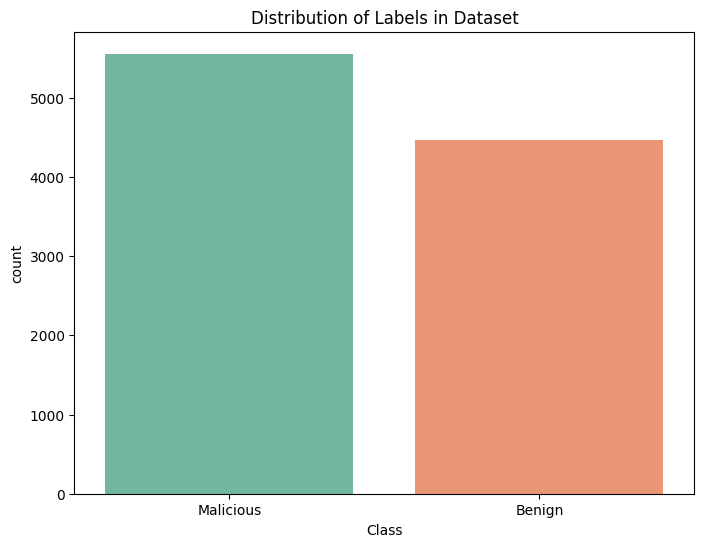

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file into a DataFrame
file_path = '/content/PDFMalware2022.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
print(df.head())

# Display the counts of each class
label_counts = df['Class'].value_counts()
print("\nClass distribution in dataset:")
print(label_counts)

# Distribution of labels
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=df, palette='Set2')
plt.title('Distribution of Labels in Dataset')
plt.show()


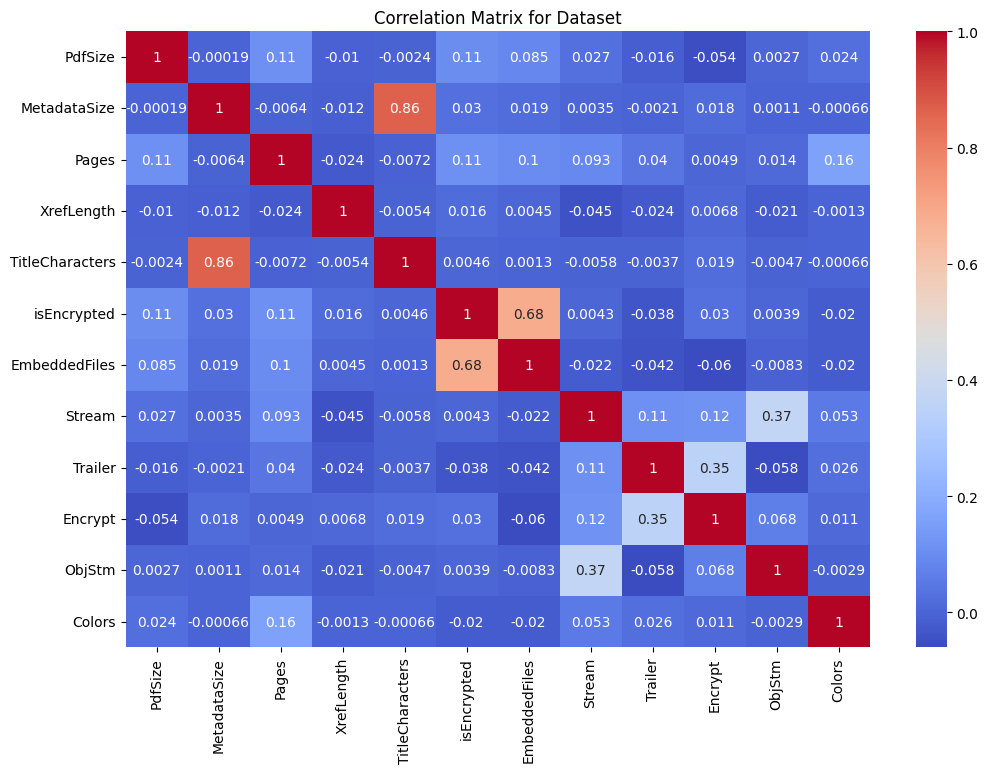

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Drop or encode non-numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Correlation matrix for numeric data
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Dataset')
plt.show()


#RESULTS

EMBER2018

In [ ]:
import pandas as pd

# Data for EMBER2018
models = [
    'Random Forest', 'SVM', 'XG Boost', 'ADA Boost', 'Logistic Regression',
    'KNN', 'CNN', 'MLP', 'RNN + LSTM', 'Transformers', 'Stacking Ensemble', 'Voting Classifier'
]
accuracy = [0.9963, 0.6240, 0.9966, 0.9966, 0.7506, 0.9508, 0.7842, 0.7838, 0.5038, 0.7666, 0.7898, 0.7898]
macro_avg_precision = [0.66, 0.45, 1.00, 1.00, 0.56, 0.66, 0.61, 0.52, 0.75, 0.59, 0.53, 0.53]
macro_avg_recall = [0.66, 0.52, 1.00, 1.00, 0.50, 0.63, 0.65, 0.65, 0.50, 0.64, 0.66, 0.66]
macro_avg_f1 = [0.66, 0.46, 1.00, 1.00, 0.49, 0.65, 0.59, 0.58, 0.34, 0.59, 0.58, 0.58]
weighted_avg_precision = [1.00, 0.54, 1.00, 1.00, 0.83, 1.00, 0.68, 0.63, 0.75, 0.67, 0.63, 0.63]
weighted_avg_recall = [1.00, 0.62, 1.00, 1.00, 0.75, 0.95, 0.78, 0.78, 0.50, 0.77, 0.79, 0.79]
weighted_avg_f1 = [1.00, 0.55, 1.00, 1.00, 0.73, 0.97, 0.70, 0.70, 0.34, 0.70, 0.70, 0.70]

# Create DataFrame
df_ember2018 = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy,
    'Macro Avg Precision': macro_avg_precision,
    'Macro Avg Recall': macro_avg_recall,
    'Macro Avg F1-Score': macro_avg_f1,
    'Weighted Avg Precision': weighted_avg_precision,
    'Weighted Avg Recall': weighted_avg_recall,
    'Weighted Avg F1-Score': weighted_avg_f1
})

print("EMBER2018 Results Summary:")
print(df_ember2018)


EMBER2018 Results Summary:
                  Model  Accuracy  Macro Avg Precision  Macro Avg Recall  \
0         Random Forest    0.9963                 0.66              0.66   
1                   SVM    0.6240                 0.45              0.52   
2              XG Boost    0.9966                 1.00              1.00   
3             ADA Boost    0.9966                 1.00              1.00   
4   Logistic Regression    0.7506                 0.56              0.50   
5                   KNN    0.9508                 0.66              0.63   
6                   CNN    0.7842                 0.61              0.65   
7                   MLP    0.7838                 0.52              0.65   
8            RNN + LSTM    0.5038                 0.75              0.50   
9          Transformers    0.7666                 0.59              0.64   
10    Stacking Ensemble    0.7898                 0.53              0.66   
11    Voting Classifier    0.7898                 0.53       

CIC-EvasivePDF2022 Dataset

In [ ]:
import pandas as pd

# Data for CIC-EvasivePDF2022
models = [
    'Random Forest', 'XG Boost', 'Ada Boost', 'Logistic Regression',
    'KNN', 'CNN', 'MLP', 'RNN + LSTM', 'Transformers', 'Stacking Ensemble', 'Voting Classifier'
]
accuracy = [0.9930, 0.9920, 0.9890, 0.9147, 0.9696, 0.9810, 0.9516, 0.9621, 0.99, 0.9880, 0.9910]
macro_avg_precision = [0.99, 0.99, 0.99, 0.91, 0.97, 0.98, 0.92, 0.95, 0.99, 0.99, 0.99]
macro_avg_recall = [0.99, 0.99, 0.98, 0.90, 0.96, 0.98, 0.98, 0.95, 0.98, 0.98, 0.99]
macro_avg_f1 = [0.99, 0.99, 0.99, 0.91, 0.97, 0.98, 0.95, 0.96, 0.99, 0.99, 0.99]
weighted_avg_precision = [0.99, 0.99, 0.99, 0.91, 0.97, 0.98, 0.95, 0.96, 0.99, 0.99, 0.99]
weighted_avg_recall = [0.99, 0.99, 0.99, 0.91, 0.97, 0.98, 0.95, 0.97, 0.99, 0.98, 0.99]
weighted_avg_f1 = [0.99, 0.99, 0.99, 0.91, 0.97, 0.98, 0.95, 0.96, 0.99, 0.99, 0.99]

# Create DataFrame
df_cic_evasivepdf2022 = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy,
    'Macro Avg Precision': macro_avg_precision,
    'Macro Avg Recall': macro_avg_recall,
    'Macro Avg F1-Score': macro_avg_f1,
    'Weighted Avg Precision': weighted_avg_precision,
    'Weighted Avg Recall': weighted_avg_recall,
    'Weighted Avg F1-Score': weighted_avg_f1
})

print("\nCIC-EvasivePDF2022 Results Summary:")
print(df_cic_evasivepdf2022)



CIC-EvasivePDF2022 Results Summary:
                  Model  Accuracy  Macro Avg Precision  Macro Avg Recall  \
0         Random Forest    0.9930                 0.99              0.99   
1              XG Boost    0.9920                 0.99              0.99   
2             Ada Boost    0.9890                 0.99              0.98   
3   Logistic Regression    0.9147                 0.91              0.90   
4                   KNN    0.9696                 0.97              0.96   
5                   CNN    0.9810                 0.98              0.98   
6                   MLP    0.9516                 0.92              0.98   
7            RNN + LSTM    0.9621                 0.95              0.95   
8          Transformers    0.9900                 0.99              0.98   
9     Stacking Ensemble    0.9880                 0.99              0.98   
10    Voting Classifier    0.9910                 0.99              0.99   

    Macro Avg F1-Score  Weighted Avg Precision  We

graphs

accuracy

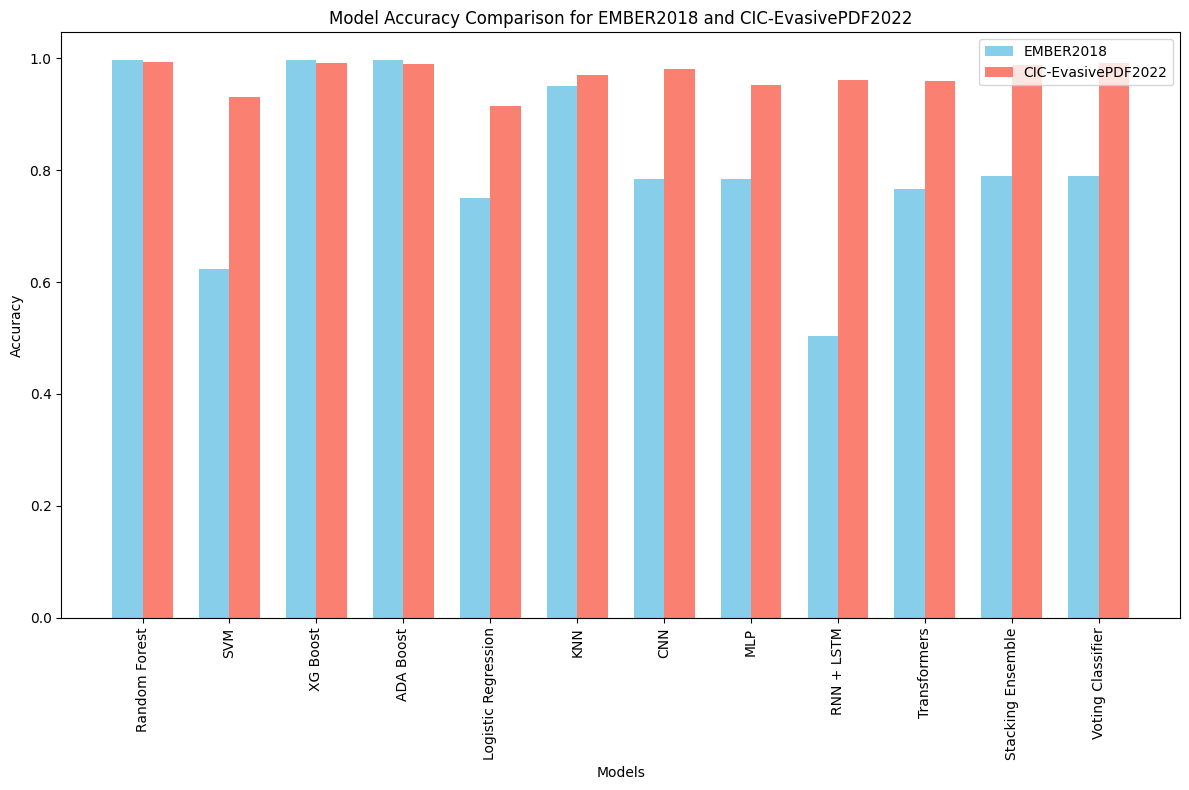

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the two datasets
models = ['Random Forest', 'SVM', 'XG Boost', 'ADA Boost', 'Logistic Regression', 'KNN', 'CNN', 'MLP', 'RNN + LSTM', 'Transformers', 'Stacking Ensemble', 'Voting Classifier']
accuracy_ember2018 = [0.9963, 0.6240, 0.9966, 0.9966, 0.7506, 0.9508, 0.7842, 0.7838, 0.5038, 0.7666, 0.7898, 0.7898]
accuracy_cic_evasivepdf2022 = [0.9930, 0.9300, 0.9920, 0.9890, 0.9147, 0.9696, 0.9810, 0.9516, 0.9621, 0.9600, 0.9880, 0.9910]  # Replace placeholder values with actual values

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))

x = np.arange(len(models))
width = 0.35

# Plot bars
rects1 = ax.bar(x - width/2, accuracy_ember2018, width, label='EMBER2018', color='skyblue')
rects2 = ax.bar(x + width/2, accuracy_cic_evasivepdf2022, width, label='CIC-EvasivePDF2022', color='salmon')

# Set labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Model Accuracy Comparison for EMBER2018 and CIC-EvasivePDF2022')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=90)
ax.legend()

fig.tight_layout()
plt.show()


precision recall and F1 score

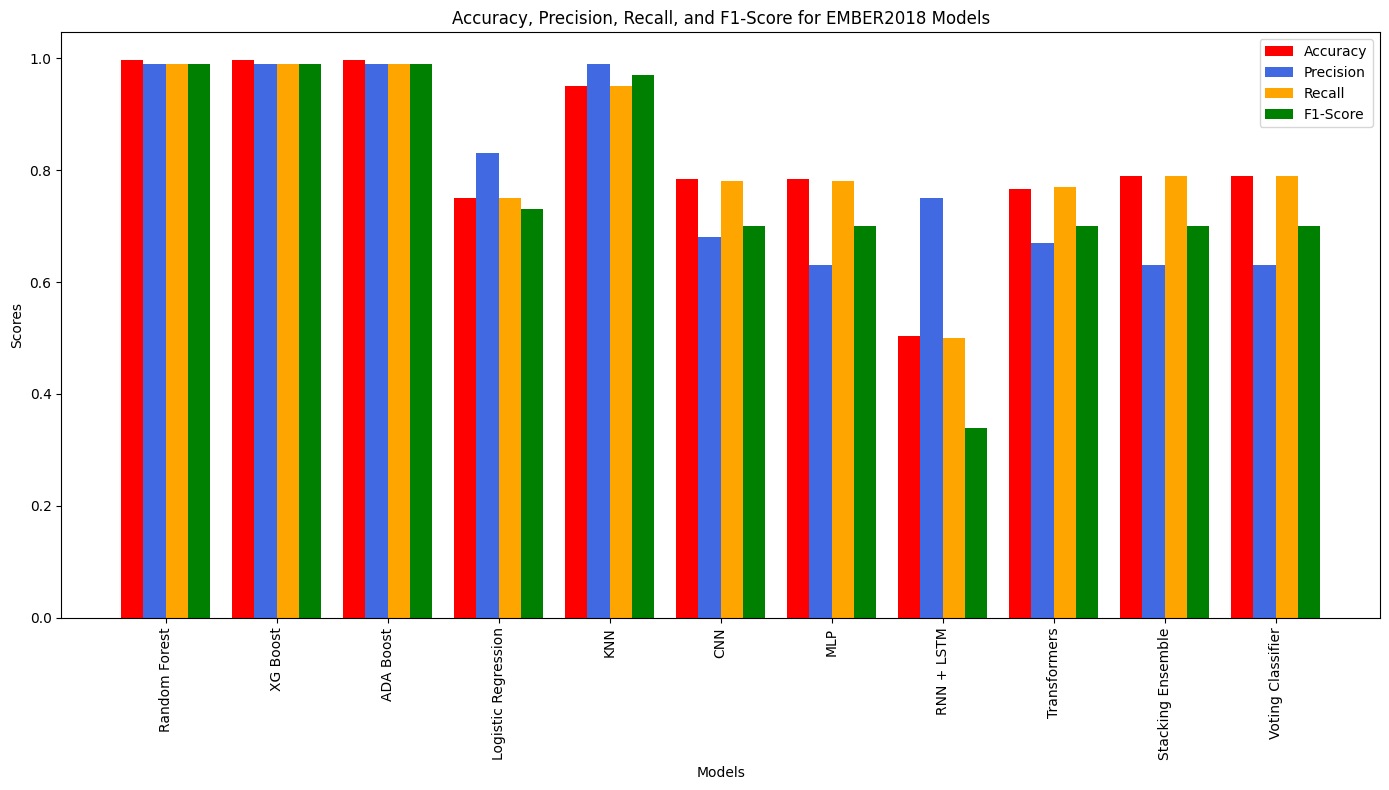

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for Precision, Recall, and F1-Score for EMBER2018
models = ['Random Forest', 'XG Boost', 'ADA Boost', 'Logistic Regression', 'KNN', 'CNN', 'MLP', 'RNN + LSTM', 'Transformers', 'Stacking Ensemble', 'Voting Classifier']

# Using the provided summary for EMBER2018
accuracy_ember2018 = [0.9963, 0.9966, 0.9966, 0.7506, 0.9508, 0.7842, 0.7838, 0.5038, 0.7666, 0.7898, 0.7898]
precision = [0.99, 0.99, 0.99, 0.83, 0.99, 0.68, 0.63, 0.75, 0.67, 0.63, 0.63]
recall = [0.99, 0.99, 0.99, 0.75, 0.95, 0.78, 0.78, 0.50, 0.77, 0.79, 0.79]
f1_score = [0.99, 0.99, 0.99, 0.73, 0.97, 0.70, 0.70, 0.34, 0.70, 0.70, 0.70]

# Create the plot
fig, ax = plt.subplots(figsize=(14, 8))

x = np.arange(len(models))
width = 0.2  # Adjusted width for better spacing

# Correctly position the bars
rects1 = ax.bar(x - 1.5 * width, accuracy_ember2018, width, label='Accuracy', color='red')
rects2 = ax.bar(x - 0.5 * width, precision, width, label='Precision', color='royalblue')
rects3 = ax.bar(x + 0.5 * width, recall, width, label='Recall', color='orange')
rects4 = ax.bar(x + 1.5 * width, f1_score, width, label='F1-Score', color='green')

# Add labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Accuracy, Precision, Recall, and F1-Score for EMBER2018 Models')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=90)
ax.legend()

# Adjust layout
fig.tight_layout()
plt.show()


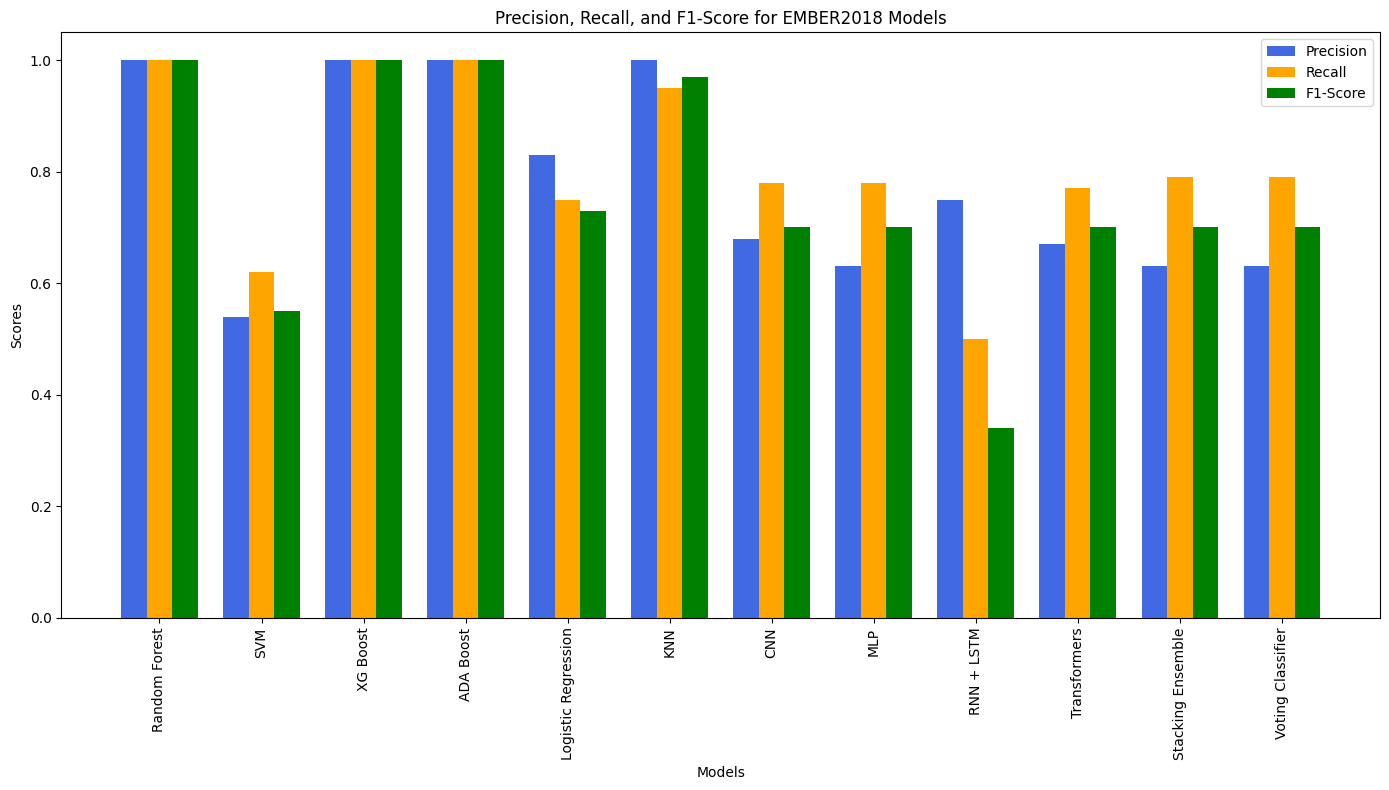

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for Precision, Recall, and F1-Score for EMBER2018
models = ['Random Forest', 'SVM', 'XG Boost', 'ADA Boost', 'Logistic Regression', 'KNN', 'CNN', 'MLP', 'RNN + LSTM', 'Transformers', 'Stacking Ensemble', 'Voting Classifier']

# Using the provided summary for EMBER2018
precision = [1.00, 0.54, 1.00, 1.00, 0.83, 1.00, 0.68, 0.63, 0.75, 0.67, 0.63, 0.63]
recall = [1.00, 0.62, 1.00, 1.00, 0.75, 0.95, 0.78, 0.78, 0.50, 0.77, 0.79, 0.79]
f1_score = [1.00, 0.55, 1.00, 1.00, 0.73, 0.97, 0.70, 0.70, 0.34, 0.70, 0.70, 0.70]

# Create the plot
fig, ax = plt.subplots(figsize=(14, 8))

x = np.arange(len(models))
width = 0.25

rects1 = ax.bar(x - width, precision, width, label='Precision', color='royalblue')
rects2 = ax.bar(x, recall, width, label='Recall', color='orange')
rects3 = ax.bar(x + width, f1_score, width, label='F1-Score', color='green')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Precision, Recall, and F1-Score for EMBER2018 Models')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=90)
ax.legend()

fig.tight_layout()
plt.show()


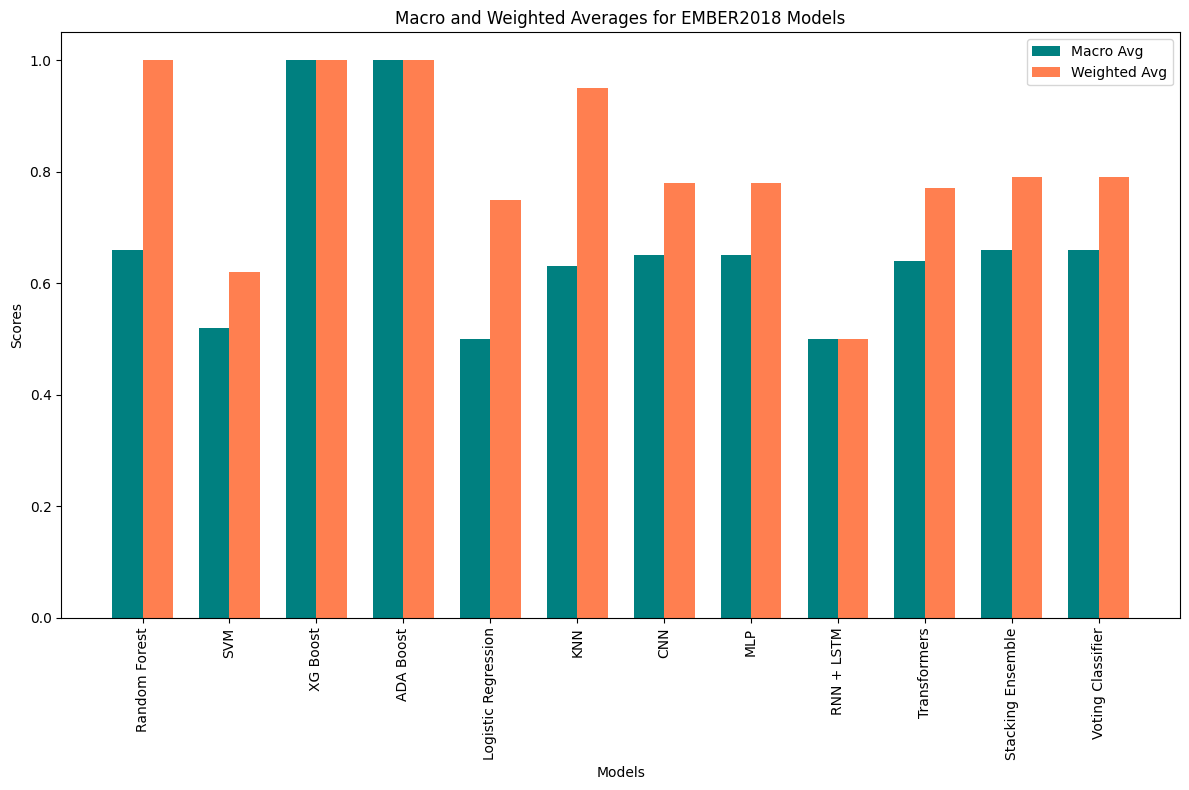

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['Random Forest', 'SVM', 'XG Boost', 'ADA Boost', 'Logistic Regression', 'KNN', 'CNN', 'MLP', 'RNN + LSTM', 'Transformers', 'Stacking Ensemble', 'Voting Classifier']
macro_avg = [0.66, 0.52, 1.00, 1.00, 0.50, 0.63, 0.65, 0.65, 0.50, 0.64, 0.66, 0.66]
weighted_avg = [1.00, 0.62, 1.00, 1.00, 0.75, 0.95, 0.78, 0.78, 0.50, 0.77, 0.79, 0.79]

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))

x = np.arange(len(models))
width = 0.35

rects1 = ax.bar(x - width/2, macro_avg, width, label='Macro Avg', color='teal')
rects2 = ax.bar(x + width/2, weighted_avg, width, label='Weighted Avg', color='coral')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Macro and Weighted Averages for EMBER2018 Models')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=90)
ax.legend()

fig.tight_layout()
plt.show()


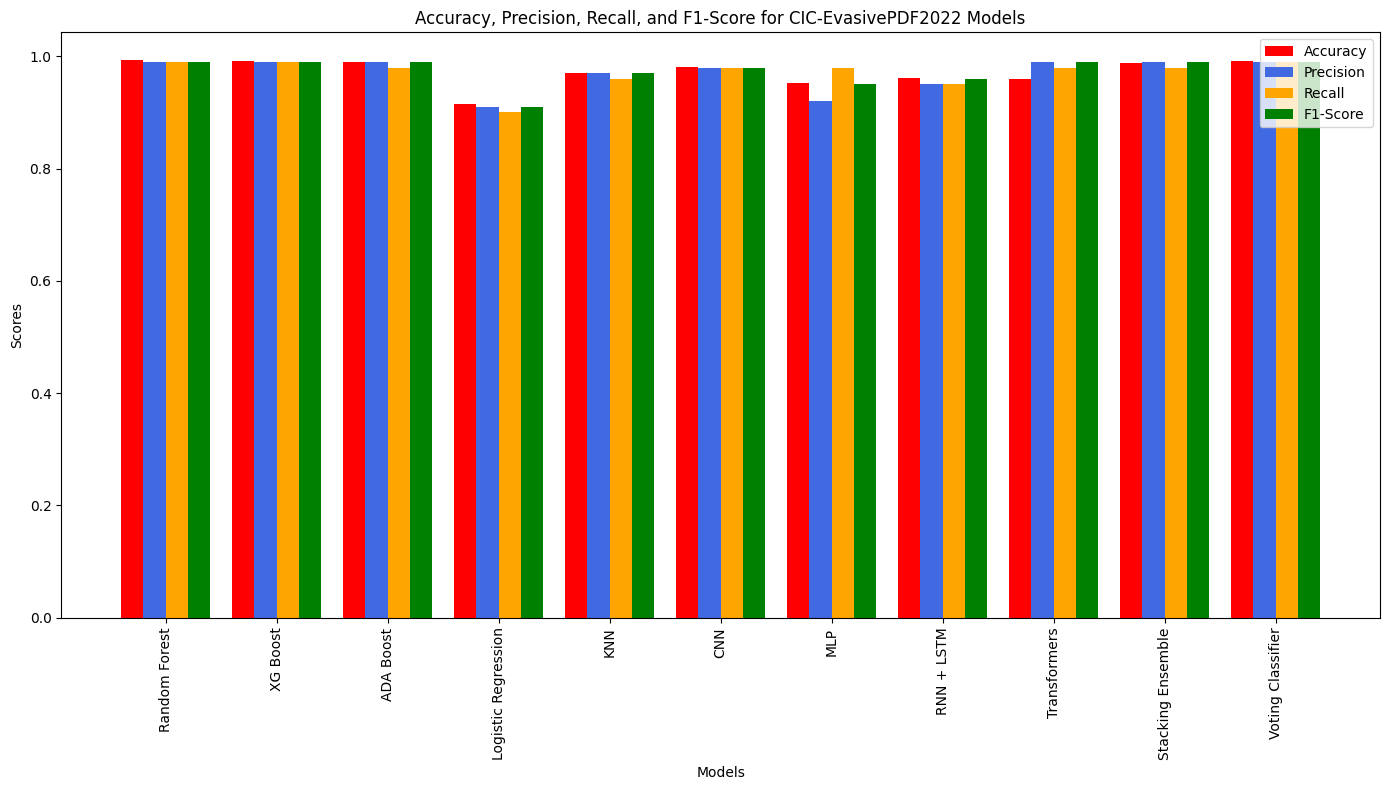

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for Precision, Recall, and F1-Score for CIC-EvasivePDF2022
models = ['Random Forest', 'XG Boost', 'ADA Boost', 'Logistic Regression', 'KNN', 'CNN', 'MLP', 'RNN + LSTM', 'Transformers', 'Stacking Ensemble', 'Voting Classifier']

# Using the provided summary for CIC-EvasivePDF2022
accuracy_cic_evasivepdf2022 = [0.9930, 0.9920, 0.9890, 0.9147, 0.9696, 0.9810, 0.9516, 0.9621, 0.9600, 0.9880, 0.9910]
precision = [0.99, 0.99, 0.99, 0.91, 0.97, 0.98, 0.92, 0.95, 0.99, 0.99, 0.99]
recall = [0.99, 0.99, 0.98, 0.90, 0.96, 0.98, 0.98, 0.95, 0.98, 0.98, 0.99]
f1_score = [0.99, 0.99, 0.99, 0.91, 0.97, 0.98, 0.95, 0.96, 0.99, 0.99, 0.99]

# Create the plot
fig, ax = plt.subplots(figsize=(14, 8))

x = np.arange(len(models))
width = 0.2  # Adjusted width for better spacing

# Correctly position the bars
rects1 = ax.bar(x - 1.5 * width, accuracy_cic_evasivepdf2022, width, label='Accuracy', color='red')
rects2 = ax.bar(x - 0.5 * width, precision, width, label='Precision', color='royalblue')
rects3 = ax.bar(x + 0.5 * width, recall, width, label='Recall', color='orange')
rects4 = ax.bar(x + 1.5 * width, f1_score, width, label='F1-Score', color='green')

# Add labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Accuracy, Precision, Recall, and F1-Score for CIC-EvasivePDF2022 Models')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=90)
ax.legend()

# Adjust layout
fig.tight_layout()
plt.show()


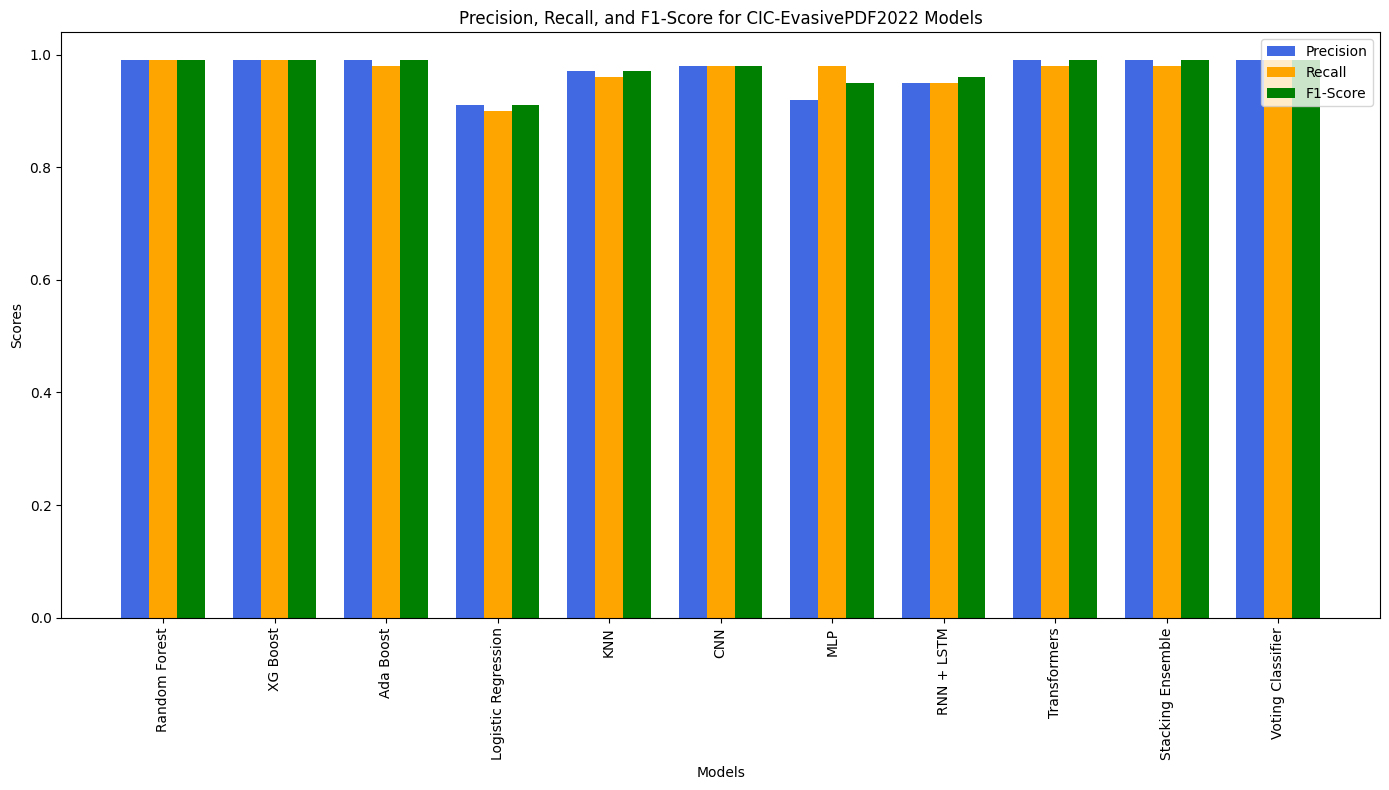

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for Precision, Recall, and F1-Score for CIC-EvasivePDF2022
models = ['Random Forest', 'SVM', 'XG Boost', 'Ada Boost', 'Logistic Regression', 'KNN', 'CNN', 'MLP', 'RNN + LSTM', 'Transformers', 'Stacking Ensemble', 'Voting Classifier']

precision = [0.99, 0.99, 0.99, 0.91, 0.97, 0.98, 0.92, 0.95, 0.99, 0.99, 0.99]
recall = [0.99, 0.99, 0.98, 0.90, 0.96, 0.98, 0.98, 0.95, 0.98, 0.98, 0.99]
f1_score = [0.99, 0.99, 0.99, 0.91, 0.97, 0.98, 0.95, 0.96, 0.99, 0.99, 0.99]

# Create the plot
fig, ax = plt.subplots(figsize=(14, 8))

x = np.arange(len(models))
width = 0.25

rects1 = ax.bar(x - width, precision, width, label='Precision', color='royalblue')
rects2 = ax.bar(x, recall, width, label='Recall', color='orange')
rects3 = ax.bar(x + width, f1_score, width, label='F1-Score', color='green')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Precision, Recall, and F1-Score for CIC-EvasivePDF2022 Models')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=90)
ax.legend()

fig.tight_layout()
plt.show()


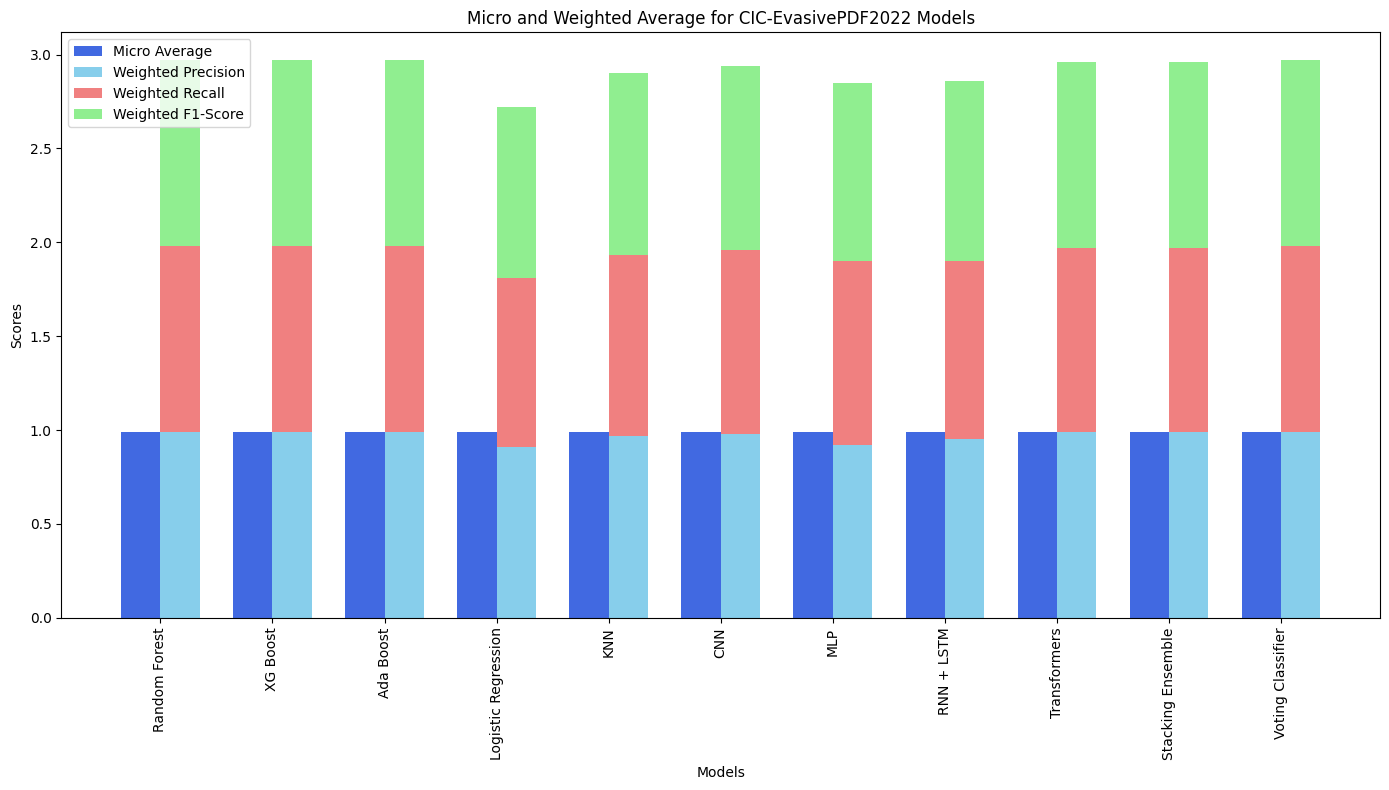

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for CIC-EvasivePDF2022
models = ['Random Forest', 'XG Boost', 'Ada Boost', 'Logistic Regression', 'KNN', 'CNN', 'MLP', 'RNN + LSTM', 'Transformers', 'Stacking Ensemble', 'Voting Classifier']

# Micro Average values (constant for all models here)
micro_avg = [0.99] * len(models)

# Weighted Average values
weighted_precision = [0.99, 0.99, 0.99, 0.91, 0.97, 0.98, 0.92, 0.95, 0.99, 0.99, 0.99]
weighted_recall = [0.99, 0.99, 0.99, 0.90, 0.96, 0.98, 0.98, 0.95, 0.98, 0.98, 0.99]
weighted_f1_score = [0.99, 0.99, 0.99, 0.91, 0.97, 0.98, 0.95, 0.96, 0.99, 0.99, 0.99]

# Create the plot
fig, ax = plt.subplots(figsize=(14, 8))

x = np.arange(len(models))
width = 0.35

# Plot Micro Average
rects1 = ax.bar(x - width/2, micro_avg, width, label='Micro Average', color='royalblue')

# Plot Weighted Average
rects2 = ax.bar(x + width/2, weighted_precision, width, label='Weighted Precision', color='skyblue')
rects3 = ax.bar(x + width/2, weighted_recall, width, bottom=weighted_precision, label='Weighted Recall', color='lightcoral')
rects4 = ax.bar(x + width/2, weighted_f1_score, width, bottom=np.array(weighted_precision) + np.array(weighted_recall), label='Weighted F1-Score', color='lightgreen')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Micro and Weighted Average for CIC-EvasivePDF2022 Models')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=90)
ax.legend()

fig.tight_layout()
plt.show()
